# Importing useful packages

In [ ]:
#Import useful packages
import pandas as pd  
import numpy as np  
import math
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Essentials
import datetime
import random

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA


# Data preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Read data
train_df=pd.read_csv('/content/drive/MyDrive/Analytics Edge/Kaggle/train_1.csv')
test_df=pd.read_csv('/content/drive/MyDrive/Analytics Edge/Kaggle/test_1.csv')
submit_df=pd.read_csv('/content/drive/MyDrive/Analytics Edge/Kaggle/submission_sample_1.csv', sep=';')

In [ ]:
train_df.head()

,Unnamed: 0,OBJECTID,CMM,CM,TYPE_,NIVEAU,GISEMENT,TRANCHE,ZONE_,RAPPORT_MIN,MINR_PASSANT,X,Y,Z,PT,PP,BPL_B,RP,CO2_B,CAO_B,SIO2_B,FE2O3_B,AL2O3_B,F_B,CORG_B,NA2O_B,K2O_B,MGO_B,CD_B,U_B,AS_B,V_B,ZN_B,TI_B,TR_B,SR_B,CL_B,Mo_B,Cr_B,SIO2_L,MGO_L,CD_L,CO2_L,SO3_B,AS_L,CL_L,SIO2R_B,Th_B,ORDRE,OBS
0,1,1,CMM1,CM698,GEOCHIMIE,Niveau 1,G1,T1,NaN,0,0,"262872,4336","196575,5013","476,958012","0,514138817","0,514138817","57,82347901","71,46529563","4,224507284","25,38131962","5,235646958","0,214224507","0,402742074","3,333333333",0,0,0,"0,454155955","4,284490146","103,6846615","9,42587832","199,6572408","226,2210797",0,0,"838,0462725",0,0,0,0,"0,248500428",0,0,0,0,0,0,0,"5,998286204",0
1,3,3,CMM3,CM705,GEOCHIMIE,Niveau 1,G1,T2,NaN,0,0,"295684,5844","196491,1825","512,9562982","0,556983719","0,556983719","49,70008569","67,51499572","7,257926307","46,28963153","6,246786632","0,154241645","0,616966581","2,887746358",0,0,0,"0,462724936","12,85347044","110,5398458","7,712082262","94,2587832","105,3984576",0,0,"754,0702656",0,0,0,0,"0,334190231",0,0,0,0,0,0,0,"5,998286204",0
2,6,6,CMM6,CM944,GEOCHIMIE,Niveau 1,G1,T3,NaN,0,0,"275408,012","196147,3693","470,9511568","0,685518423","0,685518423","44,02742074","60,11996572","9,468723222",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"7,754927164",0,0,0,0,0,0,0,"5,998286204",0
3,7,7,CMM1,CM698,GEOCHIMIE,Niveau 2,G1,T1,NaN,0,0,"262872,4336","196575,5013","476,958012","0,257069409","0,257069409","46,58097686","66,22107969","8,449014567","23,28191945","6,529562982","0,162810626","0,625535561","2,716366752",0,0,0,"1,945158526","5,141388175","89,11739503","7,712082262","71,97943445","183,3761782",0,0,"698,3718937",0,0,0,0,"0,471293916",0,0,0,0,0,0,0,"9,42587832",0
4,9,9,CMM7,CM703,GEOCHIMIE,Niveau 2,G1,T1,NaN,0,0,"292263,4876","195937,1979","483,033419","0,514138817","0,471293916","51,28534704","67,00942588","5,544130249",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"9,42587832",0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10716 entries, 0 to 10715
Data columns (total 50 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    10716 non-null  int64 
 1   OBJECTID      10716 non-null  int64 
 2   CMM           10716 non-null  object
 3   CM            10716 non-null  object
 4   TYPE_         10716 non-null  object
 5   NIVEAU        10716 non-null  object
 6   GISEMENT      10716 non-null  object
 7   TRANCHE       6563 non-null   object
 8   ZONE_         9658 non-null   object
 9   RAPPORT_MIN   10716 non-null  object
 10  MINR_PASSANT  10716 non-null  object
 11  X             10716 non-null  object
 12  Y             10716 non-null  object
 13  Z             10716 non-null  object
 14  PT            10716 non-null  object
 15  PP            10716 non-null  object
 16  BPL_B         10716 non-null  object
 17  RP            10716 non-null  object
 18  CO2_B         10716 non-null  object
 19  CAO_

In [ ]:
train_df.describe()

,Unnamed: 0,OBJECTID
count,10716.000000,10716.000000
mean,7656.542553,7656.542553
std,4419.409735,4419.409735
min,1.000000,1.000000
25%,3829.750000,3829.750000
50%,7656.500000,7656.500000
75%,11485.250000,11485.250000
max,15310.000000,15310.000000


We have noticed that numerical variables have comma (,) instead of (.) These variables can't be processed as floats and hence need to be modified

In [ ]:
for x in [ 'X', 'Y', 'Z', 'PT',
       'PP', 'BPL_B', 'RP', 'CO2_B', 'CAO_B', 'SIO2_B', 'FE2O3_B', 'AL2O3_B',
       'F_B', 'CORG_B', 'NA2O_B', 'K2O_B', 'MGO_B', 'CD_B', 'U_B', 'AS_B',
       'V_B', 'ZN_B', 'TI_B', 'TR_B', 'SR_B', 'CL_B', 'Mo_B', 'Cr_B', 'SIO2_L',
       'MGO_L', 'CD_L', 'CO2_L', 'SO3_B', 'AS_L', 'CL_L', 'SIO2R_B', 'Th_B',
       'ORDRE', 'OBS']:

       train_df[x] = train_df[x].astype('string')
       train_df[x] = train_df[x].apply(lambda x: x.replace(',','.'))

In [ ]:
#let's do the same for the test set

for x in [ 'X', 'Y', 'Z', 'PT',
       'PP','RP', 'CO2_B', 'CAO_B', 'SIO2_B', 'FE2O3_B', 'AL2O3_B',
       'F_B', 'CORG_B', 'NA2O_B', 'K2O_B', 'MGO_B', 'CD_B', 'U_B', 'AS_B',
       'V_B', 'ZN_B', 'TI_B', 'TR_B', 'SR_B', 'CL_B', 'Mo_B', 'Cr_B', 'SIO2_L',
       'MGO_L', 'CD_L', 'CO2_L', 'SO3_B', 'AS_L', 'CL_L', 'SIO2R_B', 'Th_B',
       'ORDRE', 'OBS']:

       test_df[x] = test_df[x].astype('string')
       test_df[x] = test_df[x].apply(lambda x: x.replace(',','.'))

In [ ]:
#let's define the type of numerical variables as floats
for x in ['X', 'Y', 'Z', 'PT',
       'PP', 'BPL_B', 'RP', 'CO2_B', 'CAO_B', 'SIO2_B', 'FE2O3_B', 'AL2O3_B',
       'F_B', 'CORG_B', 'NA2O_B', 'K2O_B', 'MGO_B', 'CD_B', 'U_B', 'AS_B',
       'V_B', 'ZN_B', 'TI_B', 'TR_B', 'SR_B', 'CL_B', 'Mo_B', 'Cr_B', 'SIO2_L',
       'MGO_L', 'CD_L', 'CO2_L', 'SO3_B', 'AS_L', 'CL_L', 'SIO2R_B',
       'ORDRE']:

       train_df[x] = train_df[x].astype('float')

In [ ]:
#let's do the same for the test dataset

for x in ['X', 'Y', 'Z', 'PT',
       'PP','RP', 'CO2_B', 'CAO_B', 'SIO2_B', 'FE2O3_B', 'AL2O3_B',
       'F_B', 'CORG_B', 'NA2O_B', 'K2O_B', 'MGO_B', 'CD_B', 'U_B', 'AS_B',
       'V_B', 'ZN_B', 'TI_B', 'TR_B', 'SR_B', 'CL_B', 'Mo_B', 'Cr_B', 'SIO2_L',
       'MGO_L', 'CD_L', 'CO2_L', 'SO3_B', 'AS_L', 'CL_L', 'SIO2R_B',
       'ORDRE']:

       test_df[x] = test_df[x].astype('float')

In [ ]:
#Let's concat the train and test dataframes
total = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)
total


,Unnamed: 0,OBJECTID,CMM,CM,TYPE_,NIVEAU,GISEMENT,TRANCHE,ZONE_,RAPPORT_MIN,MINR_PASSANT,X,Y,Z,PT,PP,BPL_B,RP,CO2_B,CAO_B,SIO2_B,FE2O3_B,AL2O3_B,F_B,CORG_B,NA2O_B,K2O_B,MGO_B,CD_B,U_B,AS_B,V_B,ZN_B,TI_B,TR_B,SR_B,CL_B,Mo_B,Cr_B,SIO2_L,MGO_L,CD_L,CO2_L,SO3_B,AS_L,CL_L,SIO2R_B,Th_B,ORDRE,OBS
0,1,1,CMM1,CM698,GEOCHIMIE,Niveau 1,G1,T1,NaN,0,0,262872.4336,196575.5013,476.958012,0.514139,0.514139,57.823479,71.465296,4.224507,25.381320,5.235647,0.214225,0.402742,3.333333,0.0,0.0,0.0,0.454156,4.284490,103.684662,9.425878,199.657241,226.221080,0.0,0.0,838.046272,0.000000,0.0,0.0,0.0,0.248500,0.0,0.0,0.0,0.0,0.0,0.0,0,5.998286,0
1,3,3,CMM3,CM705,GEOCHIMIE,Niveau 1,G1,T2,NaN,0,0,295684.5844,196491.1825,512.956298,0.556984,0.556984,49.700086,67.514996,7.257926,46.289632,6.246787,0.154242,0.616967,2.887746,0.0,0.0,0.0,0.462725,12.853470,110.539846,7.712082,94.258783,105.398458,0.0,0.0,754.070266,0.000000,0.0,0.0,0.0,0.334190,0.0,0.0,0.0,0.0,0.0,0.0,0,5.998286,0
2,6,6,CMM6,CM944,GEOCHIMIE,Niveau 1,G1,T3,NaN,0,0,275408.0120,196147.3693,470.951157,0.685518,0.685518,44.027421,60.119966,9.468723,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,7.754927,0.0,0.0,0.0,0.0,0.0,0.0,0,5.998286,0
3,7,7,CMM1,CM698,GEOCHIMIE,Niveau 2,G1,T1,NaN,0,0,262872.4336,196575.5013,476.958012,0.257069,0.257069,46.580977,66.221080,8.449015,23.281919,6.529563,0.162811,0.625536,2.716367,0.0,0.0,0.0,1.945159,5.141388,89.117395,7.712082,71.979434,183.376178,0.0,0.0,698.371894,0.000000,0.0,0.0,0.0,0.471294,0.0,0.0,0.0,0.0,0.0,0.0,0,9.425878,0
4,9,9,CMM7,CM703,GEOCHIMIE,Niveau 2,G1,T1,NaN,0,0,292263.4876,195937.1979,483.033419,0.514139,0.471294,51.285347,67.009426,5.544130,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,9.425878,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15305,15300,15300,CMM1824,CM977,GEOCHIMIE,Niveau 19,G16,T1,Zone4,0,0,279848.4062,208567.4979,506.769494,0.514139,0.514139,NaN,78.337618,5.475578,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,4.284490,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,850.042845,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,3.427592,0
15306,15302,15302,CMM1821,CM1423,GEOCHIMIE,Niveau 19,G16,T2,Zone25,0,0,272659.8115,221639.1260,556.263925,0.514139,0.514139,NaN,74.018852,13.496144,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.085690,0.0,0.0,0.0,0.0,0.0,0.0,0,3.427592,0
15307,15304,15304,CMM1816,CM1644,GEOCHIMIE,Niveau 20,G16,T2,Zone21,0,0,264097.3093,218069.7601,520.368466,1.242502,0.814053,NaN,70.839760,6.315338,34.387318,13.239075,0.497001,0.531277,2.579263,0.0,0.0,0.0,0.299914,13.710368,119.108826,5.998286,197.943445,172.236504,0.0,0.0,767.780634,0.000000,0.0,0.0,0.0,0.171380,0.0,0.0,0.0,0.0,0.0,0.0,0,2.570694,0
15308,15305,15305,CMM1817,CM1684,GEOCHIMIE,Niveau 20,G16,T3,Zone24,0,0,274767.0009,212524.6787,533.778920,0.342759,0.342759,NaN,44.198800,4.335904,43.718937,2.030848,0.154242,0.325621,3.487575,0.0,0.0,0.0,0.265638,5.141388,104.541560,5.141388,287.917738,142.245073,0.0,0.0,880.034276,0.000000,0.0,0.0,0.0,0.188518,0.0,0.0,0.0,0.0,0.0,0.0,0,2.570694,0


# Data exploring

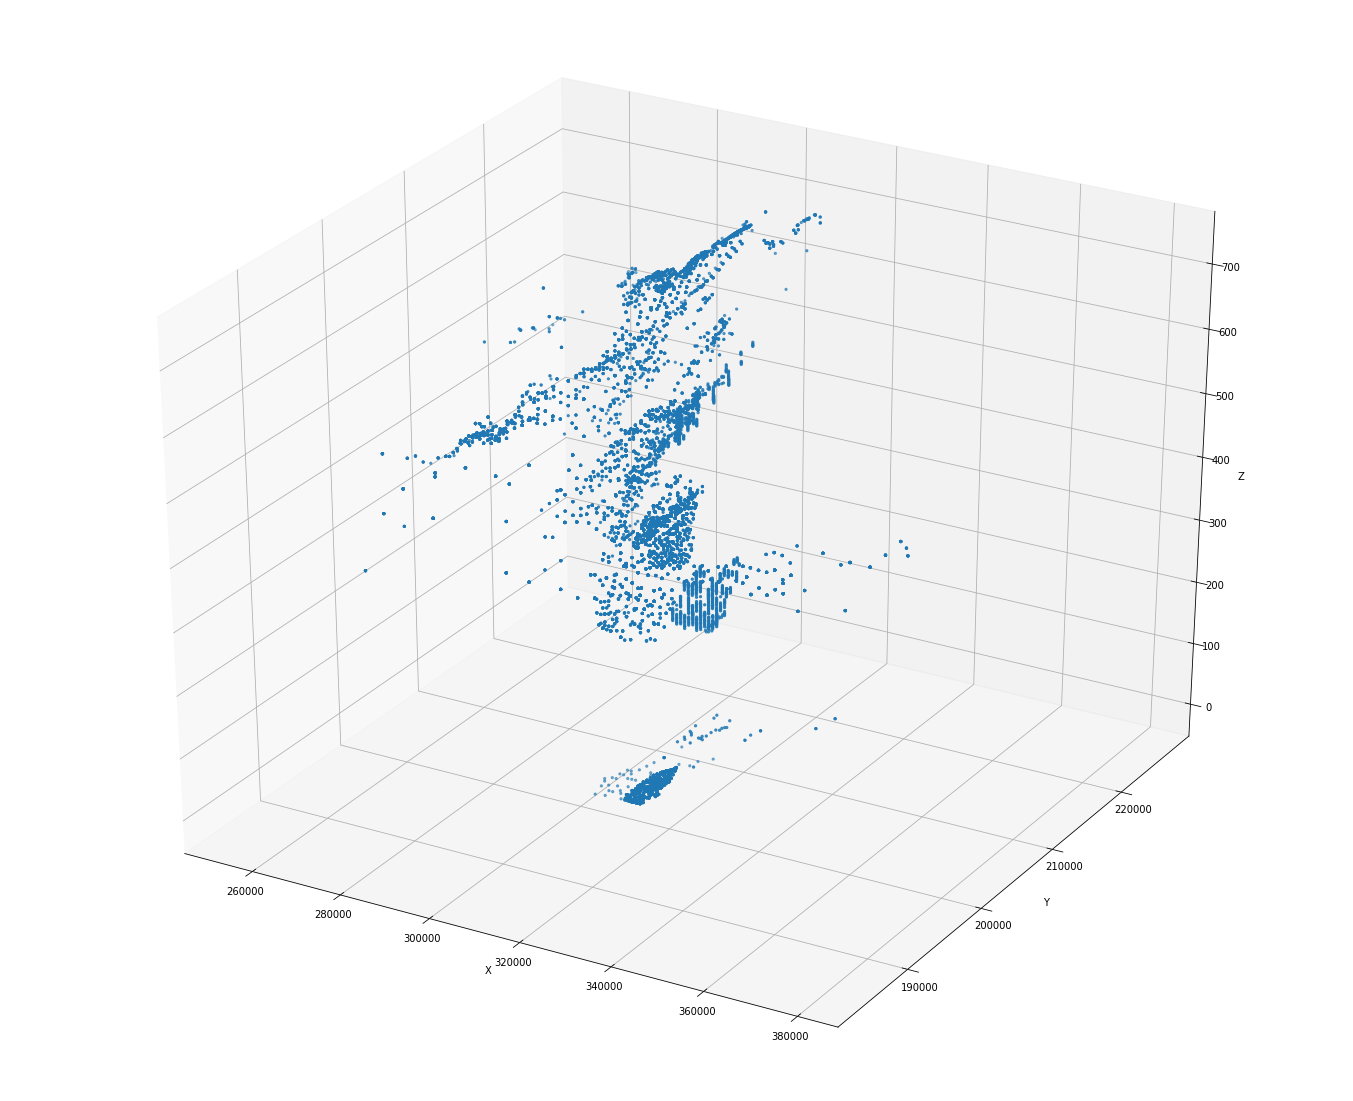

In [ ]:
#let's visualise a 3d plot of rock distribution in train dataset

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
threedee = plt.figure(figsize=(24,20)).gca(projection='3d')

threedee.scatter(total['X'], total['Y'], total['Z'], s=5)
threedee.set_xlabel('X')
threedee.set_ylabel('Y')
threedee.set_zlabel('Z')
plt.show()

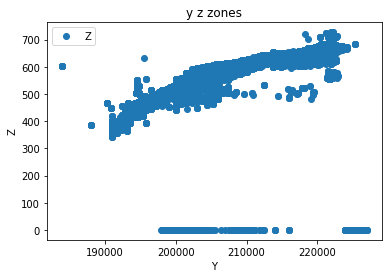

In [ ]:
#Now let's visualize in 2d

total.plot(x='Y', y='Z', style='o')  
plt.title('y z zones')  
plt.xlabel('Y')  
plt.ylabel('Z')  
plt.show()

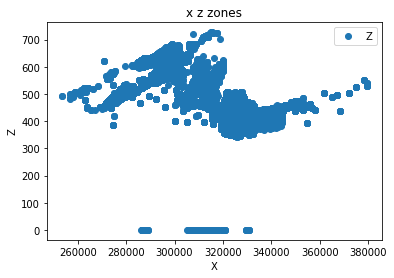

In [ ]:
total.plot(x='X', y='Z', style='o')  
plt.title('x z zones')  
plt.xlabel('X')  
plt.ylabel('Z')  
plt.show()

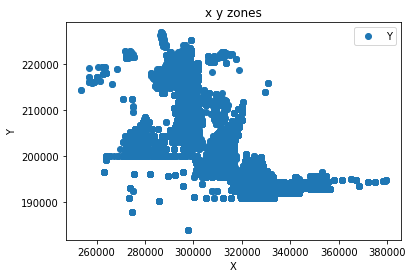

In [ ]:
total.plot(x='X', y='Y', style='o')  
plt.title('x y zones')  
plt.xlabel('X')  
plt.ylabel('Y')  
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


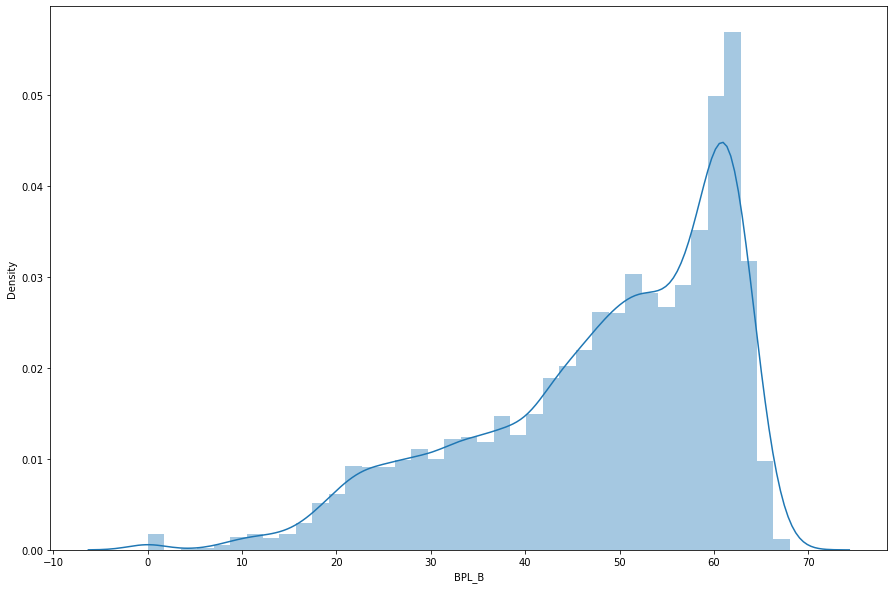

In [ ]:
#distplot of BPL_B feature

plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(train_df['BPL_B'])

In [ ]:
#Measure the Skewness and Kurtosis of BPL_B 
print("Skewness: %f" % train_df['BPL_B'].skew())
print("Kurtosis: %f" % train_df['BPL_B'].kurt())

Skewness: -0.870995
Kurtosis: 0.019888


We notice that the skewness and Kurtosis of BPL_B feature are already convenient since their absolute value is close to zero.
If we try to introduce a function on the parameter BPL , like the log1 , we notice that the absolute value of the Skewness and Kurtosis will become a lot bigger, and far from zero

In [ ]:
total["log1"] = np.log1p(total["BPL_B"])
#Measure the Skewness and Kurtosis of BPL_B 
print("Skewness: %f" % total['log1'].skew())
print("Kurtosis: %f" % total['log1'].kurt())

Skewness: -3.646153
Kurtosis: 26.497061


In [ ]:
total=total.drop(['log1'], axis=1)


# Exploring categorical variables

Let's visualise how categorical features relate to BPL_B and explore wether some of them are relevant to use later in models prediction

**Correlation with CMM and CM**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


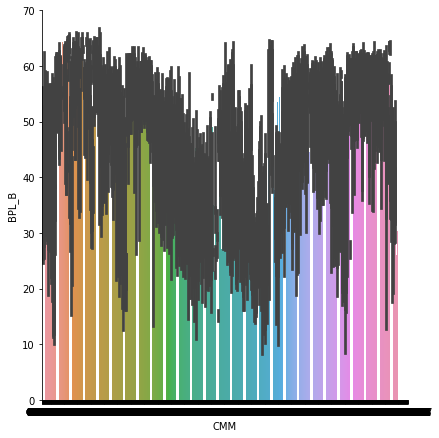

In [ ]:
#CMM 
seabornInstance.factorplot(x="CMM", y ="BPL_B", data=total, kind="bar", size=6)
plt.show()


the dark part that we observe is a superposition of several colors, so we can say that CMM had no influence in the repartition of BPL_B

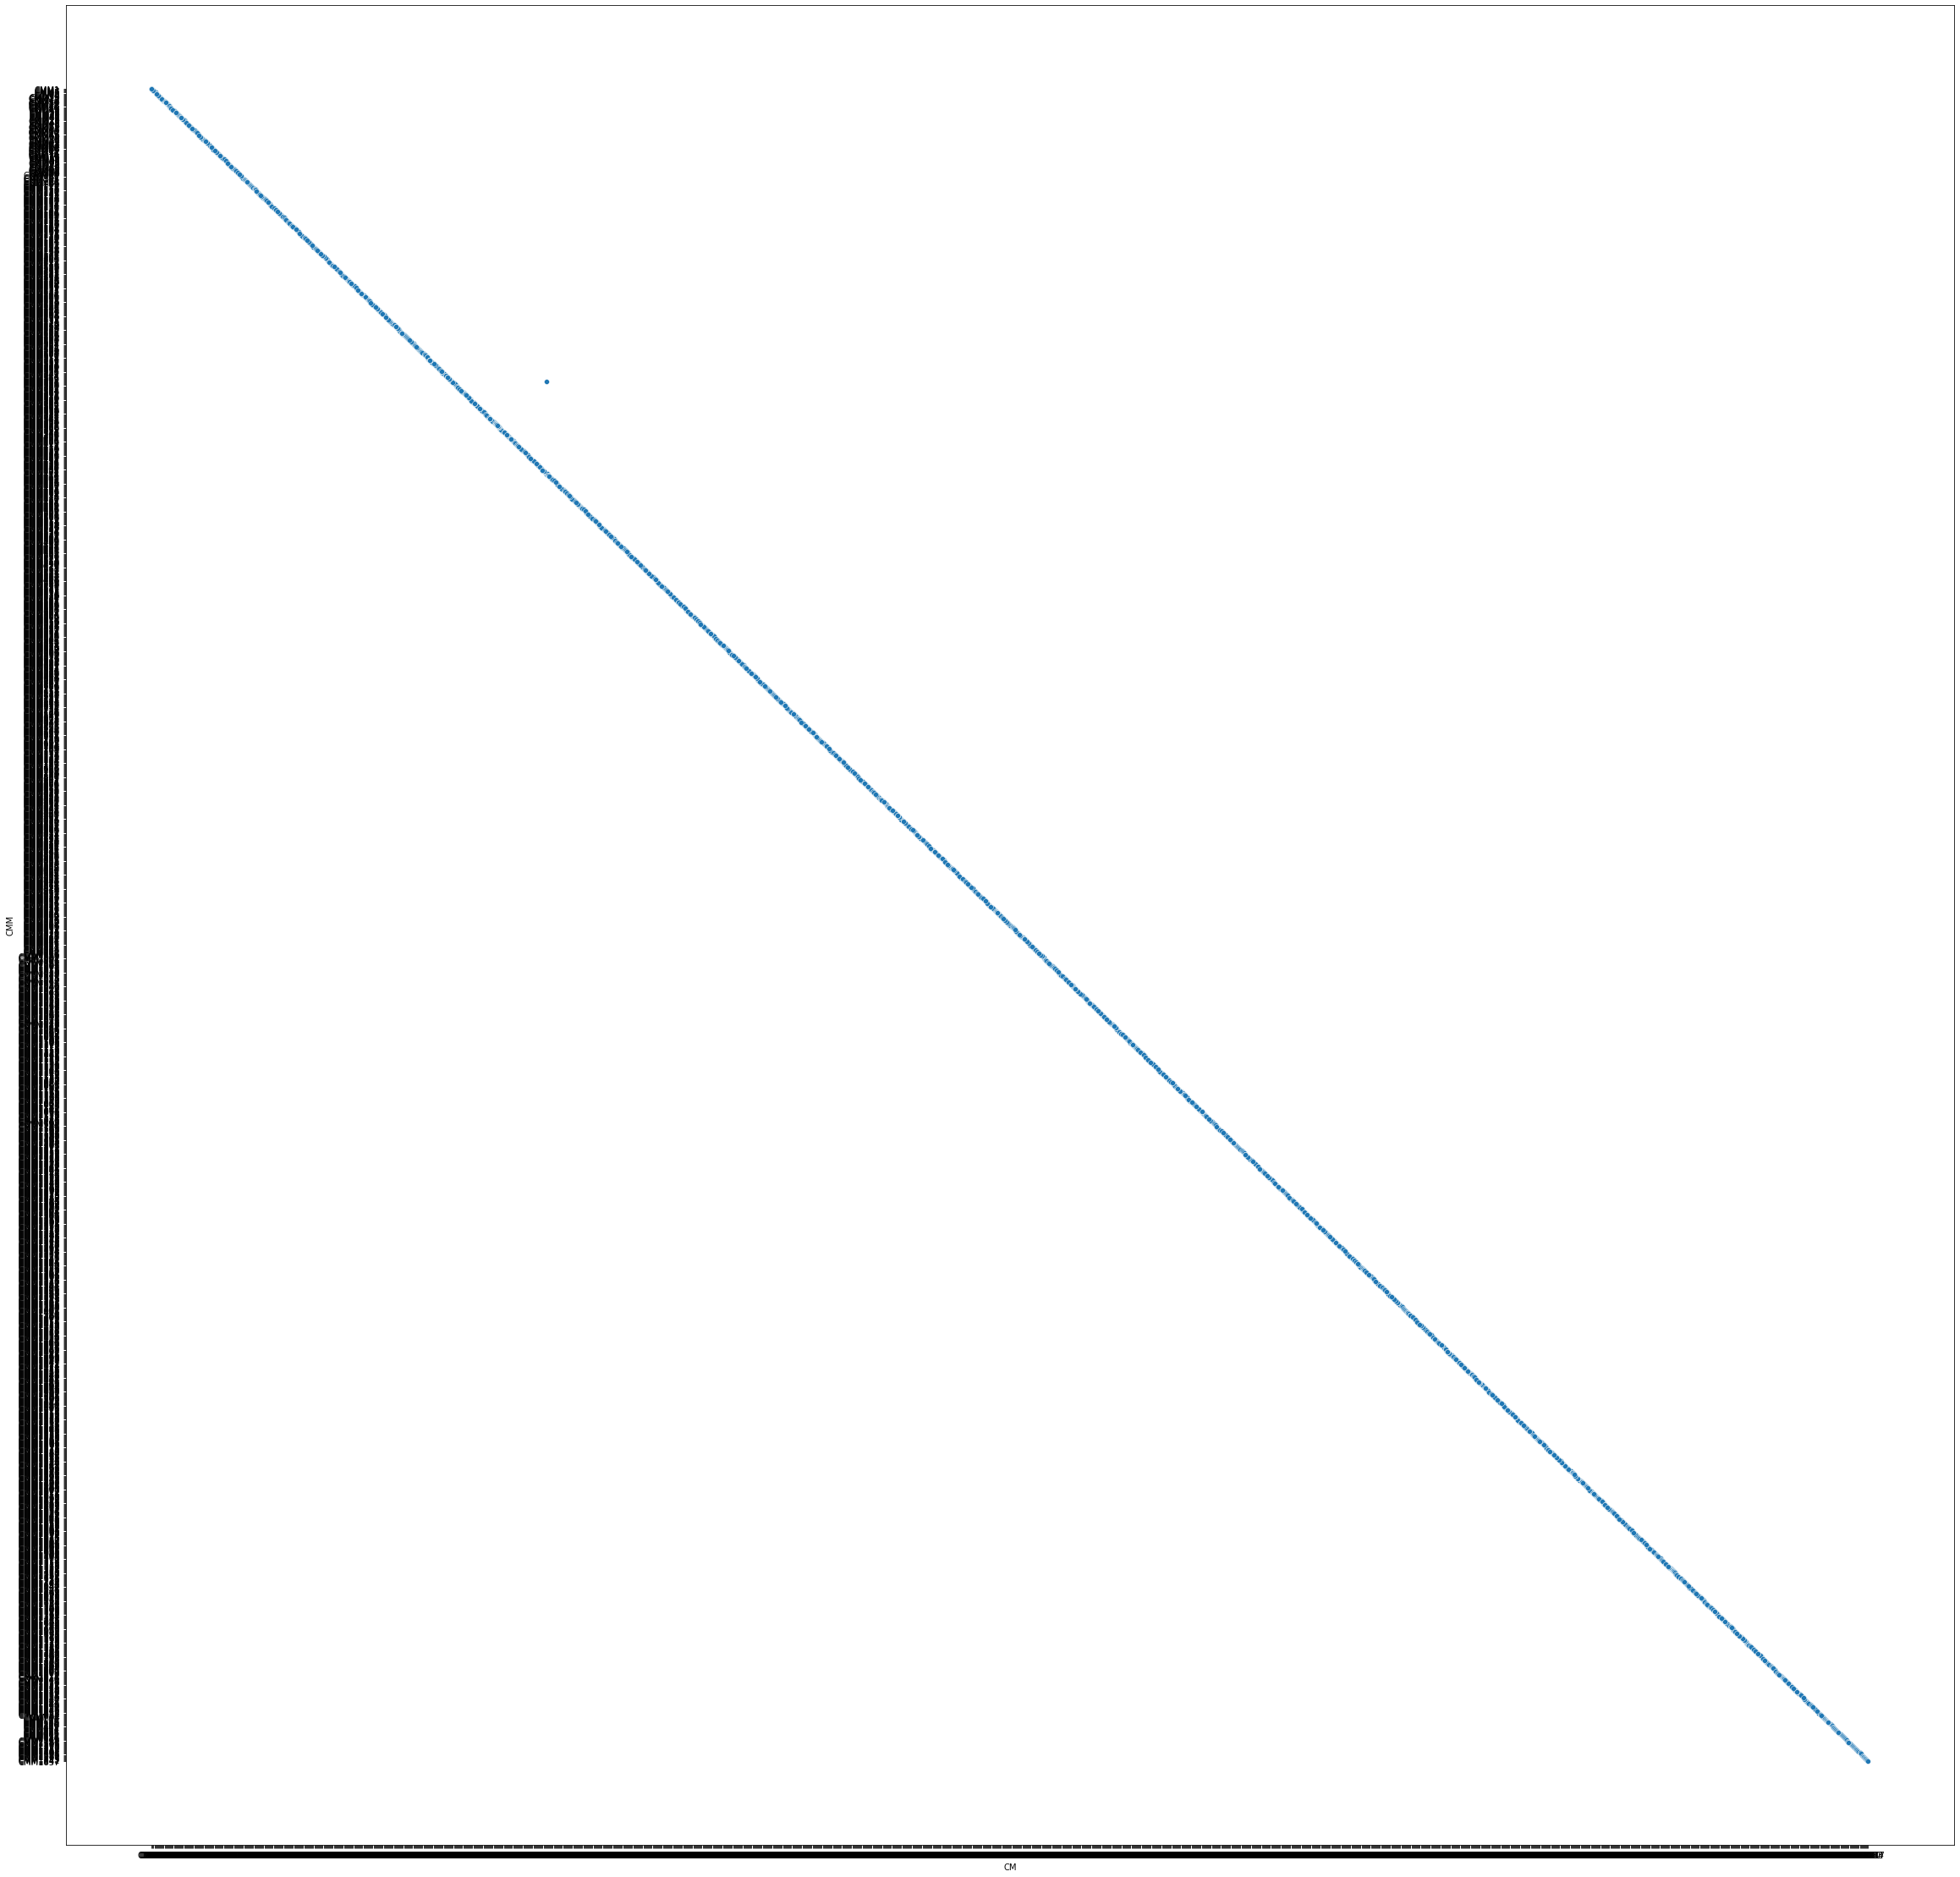

In [ ]:
#Corelation between CM and CMM
import seaborn as sns
fig_dims=(40,40)
fig,ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(data=total,x='CM',y='CMM',ax=ax)

 we observe that CM is collinear with CMM, since CMM is not correlated with BPL_B then CM is not corellated to BPL_B either

**Correlation between TRANCHE AND BPL_B**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


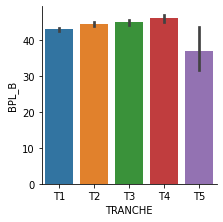

In [ ]:
#TRANCHE
seabornInstance.factorplot(x="TRANCHE", y ="BPL_B", data=total, kind="bar", size=3)
plt.show()

In [ ]:
#MOYENNE DE BPL_B pour chaque TRANCHE
total[["TRANCHE", "BPL_B"]].groupby(["TRANCHE"], as_index = False).mean()

,TRANCHE,BPL_B
0,T1,42.877953
1,T2,44.418180
2,T3,44.892624
3,T4,46.003415
4,T5,36.960690


It is observed that BPL_B does not vary much according to TRANCHE, for example T2 ans T3 have the same values of BPL_B. We can say that TRANCHE and BPL_B aren't very correlated

**Correlation between MINR_PASSANT AND BPL_B**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


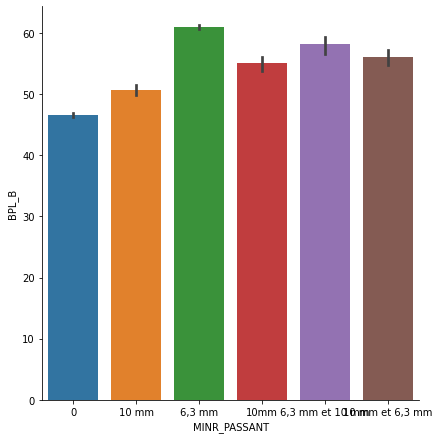

In [ ]:
#MINR_PASSANT
seabornInstance.factorplot(x="MINR_PASSANT", y ="BPL_B", data=total, kind="bar", size=6)
plt.show()

In [ ]:
#MOYENNE DE BPL_B pour chaque MINR_PASSANT
total[["MINR_PASSANT", "BPL_B"]].groupby(["MINR_PASSANT"], as_index = False).mean()

,MINR_PASSANT,BPL_B
0,0,46.579108
1,10 mm,50.650875
2,"10 mm et 6,3 mm",55.999071
3,10mm,55.010158
4,"6,3 mm",60.980516
5,"6,3 mm et 10 mm",58.138128


**Correlation between ZONE AND BPL_B**

It is observed that BPL_B does not vary much according to MINR_PASSANT since the minimum value of BPL_B is about 46.5 and the maximum value is 60

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


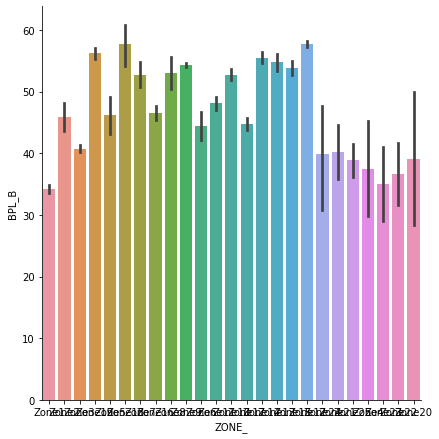

In [ ]:
#ZONE_
seabornInstance.factorplot(x="ZONE_", y ="BPL_B", data=total, kind="bar", size=6)
plt.show()

In [ ]:
#MOYENNE DE BPL_B pour chaque ZONE_
total[["ZONE_", "BPL_B"]].groupby(["ZONE_"], as_index = False).mean()

,ZONE_,BPL_B
0,Zone1,34.218275
1,Zone10,52.764466
2,Zone11,48.096658
3,Zone12,57.732255
4,Zone13,54.801217
5,Zone14,55.549393
6,Zone15,53.892291
7,Zone16,46.604564
8,Zone17,44.817083
9,Zone18,57.759579


We observe that ZONE_ has a certain impact in the distribution of BPL_B in comparison with CM, CMM... The minimum value of BPL_B depending of the ZONE_ is 34.2 and the maximum value is 57.7, a difference of 23.5!

**Correlation between GISEMENT AND BPL_B**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


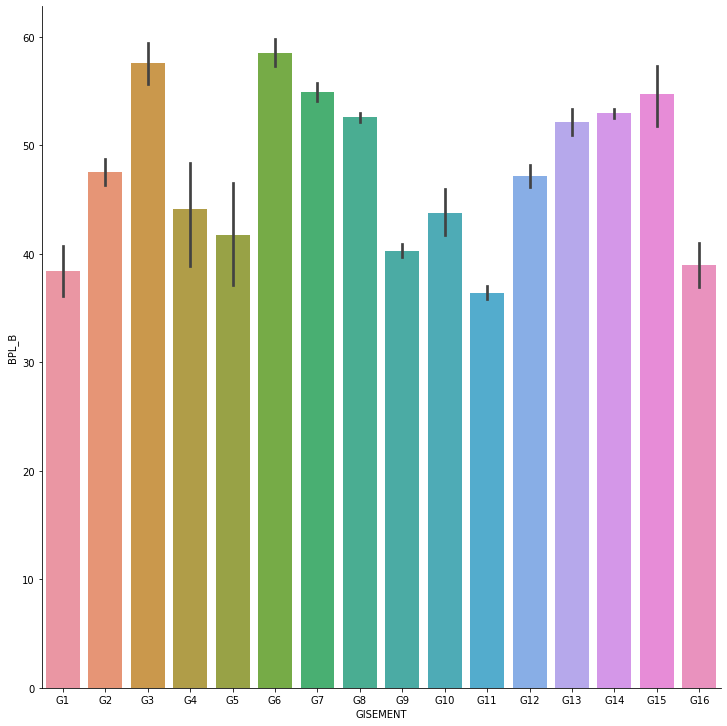

In [ ]:
#Gisement
seabornInstance.factorplot(x="GISEMENT", y ="BPL_B", data=total, kind="bar", size=10)
plt.show()

In [ ]:
#MOYENNE DE BPL_B pour chaque ZONE_
total[["GISEMENT", "BPL_B"]].groupby(["GISEMENT"], as_index = False).mean()

,GISEMENT,BPL_B
0,G1,38.442442
1,G10,43.813839
2,G11,36.440535
3,G12,47.213406
4,G13,52.165322
5,G14,52.974651
6,G15,54.762721
7,G16,38.988179
8,G2,47.533053
9,G3,57.587772


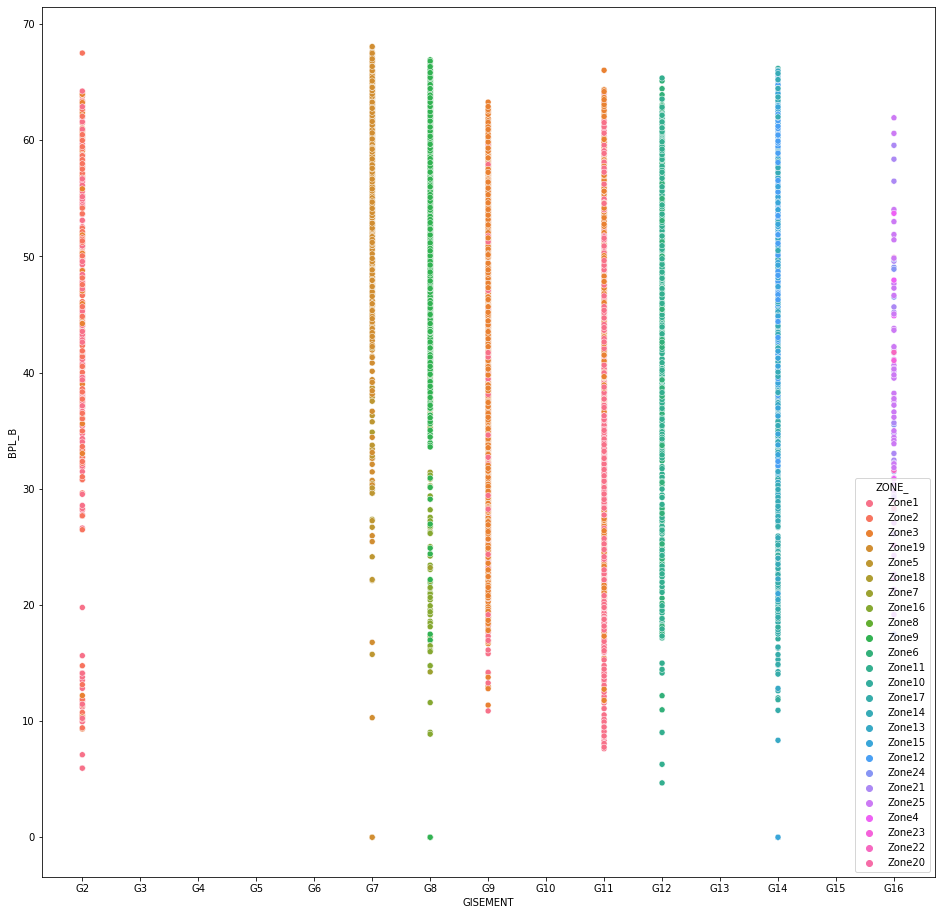

In [ ]:
fig_dims=(16,16)
fig,ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(data=total,x='GISEMENT',y='BPL_B',hue='ZONE_', ax=ax)

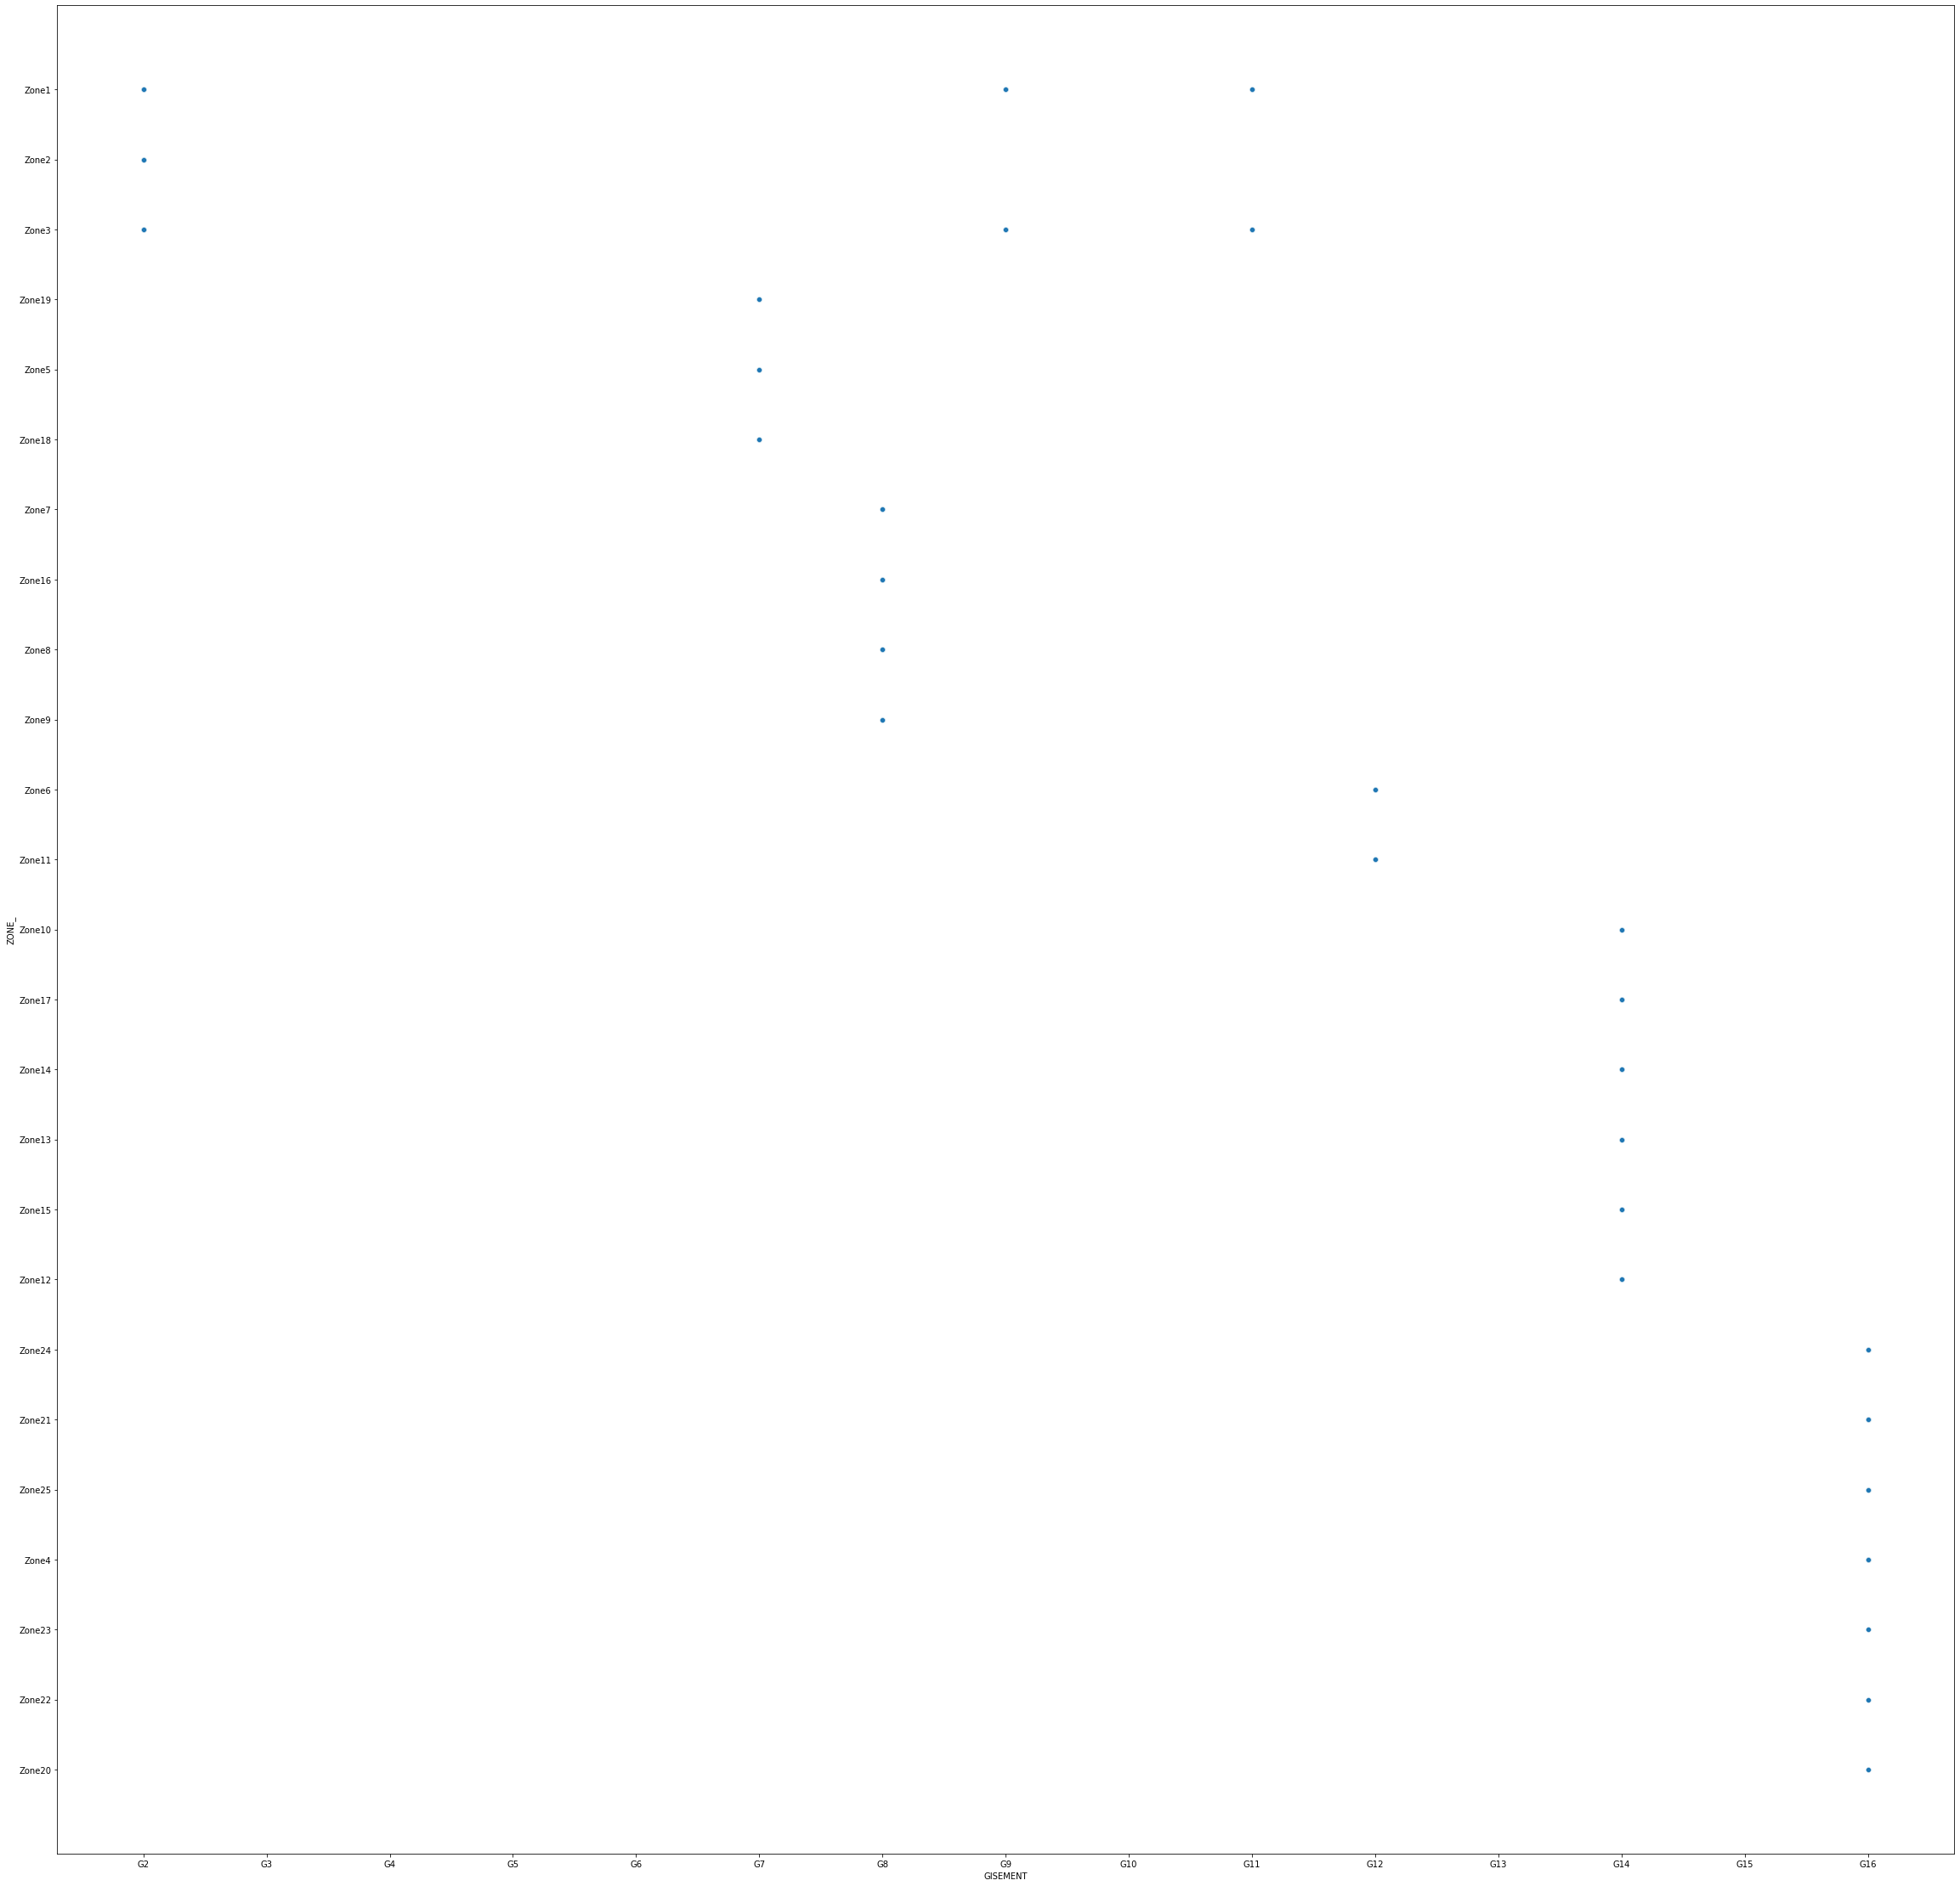

In [ ]:
import seaborn as sns
fig_dims=(40,40)
fig,ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(data=total,x='GISEMENT',y='ZONE_',ax=ax)

We observe that each GISEMENT belongs to some ZONE_, We can say that the feature GISEMENT is included in the feature ZONE_, so the information that GISEMENT may give us about BPL_B is already giver by ZONE_. We decide then to drop the feature GISEMENT.


**Correlation between TYPE_ AND BPL_B**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


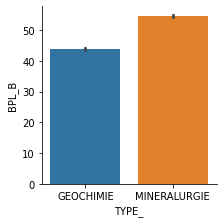

In [ ]:
#TYPE_
seabornInstance.factorplot(x="TYPE_", y ="BPL_B", data=total, kind="bar", size=3)
plt.show()

In [ ]:
#MOYENNE DE BPL_B pour chaque TYPE_
total[["TYPE_", "BPL_B"]].groupby(["TYPE_"], as_index = False).mean()

,TYPE_,BPL_B
0,GEOCHIMIE,44.022830
1,MINERALURGIE,54.689929


We observe that the TYPE_ "Mineralurgie" has bigger BPL_B than "Géochimie" , we can say that TYPE_ had an influence in the repartition of BPL_B , we decide also to keep TYPE_ 

**Correlation between NIVEAU AND BPL_B**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


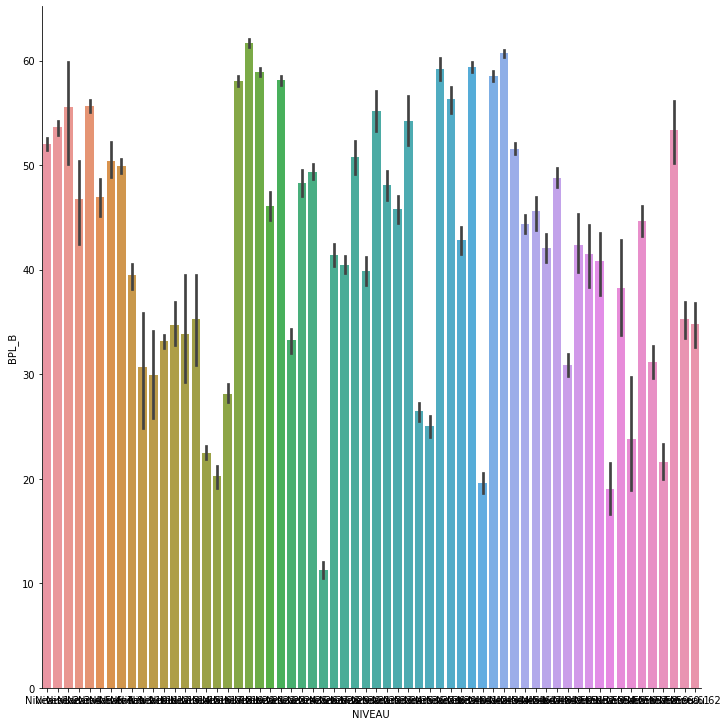

In [ ]:
#NIVEAU
seabornInstance.factorplot(x="NIVEAU", y ="BPL_B", data=total, kind="bar", size=10)
plt.show()

In [ ]:
#MOYENNE DE BPL_B pour chaque NIVEAU
total[["NIVEAU", "BPL_B"]].groupby(["NIVEAU"], as_index = False).mean()

,NIVEAU,BPL_B
0,Niveau 1,51.986504
1,Niveau 10,30.699229
2,Niveau 11,29.912882
3,Niveau 12,33.194867
4,Niveau 13,34.723769
...,...,...
57,Niveau 61,35.271351
58,Niveau 62,34.831970
59,Niveau 7,50.430770
60,Niveau 8,49.919457


We observe that BPL_B varies a lot according to NIVEAU, we decide also to keep NIVEAU

# **Conclusion**:
We didn't mention RAPPORT_MIN in our analysis because its values like "408/2003" are like dates of a rapport, so we believe it has no correlation with BPL_B.
The feature OBS and Th_B are also features we will remove since they contain mostly zeros and a value "#NOVALUE" that causes a problem.
So the categorical features we'll keep are three: ZONE_ , TYPE_ and NIVEAU

# Exploring numerical variables

We will explore how different numerical variables are correlated with BPL_B

In [ ]:
#we drop all the features of type "object"
train_df1 = train_df.drop(['Unnamed: 0','OBJECTID','TRANCHE','CMM','CM','TYPE_','NIVEAU','ZONE_','GISEMENT','Th_B','OBS'] , axis=1)
#correlation matrix (BPL_B column)
train_df2 = train_df1.corr()['BPL_B'].drop('BPL_B')
liste = train_df2[abs(train_df2)>0.05].sort_values(ascending=False)
liste

X          0.408847
AS_B       0.271843
CL_B       0.200847
F_B        0.180391
SO3_B      0.178341
U_B        0.170807
CAO_B      0.153514
TR_B       0.149640
CD_B       0.114163
V_B        0.082975
NA2O_B     0.052193
SIO2R_B    0.050615
AS_L      -0.050092
CL_L      -0.069141
FE2O3_B   -0.087242
MGO_B     -0.090161
PT        -0.090634
AL2O3_B   -0.092335
SIO2_B    -0.127730
CO2_L     -0.145762
Z         -0.203961
SIO2_L    -0.208219
Y         -0.212750
CORG_B    -0.271029
RP        -0.297132
MGO_L     -0.470741
ORDRE     -0.602302
CO2_B     -0.737601
Name: BPL_B, dtype: float64

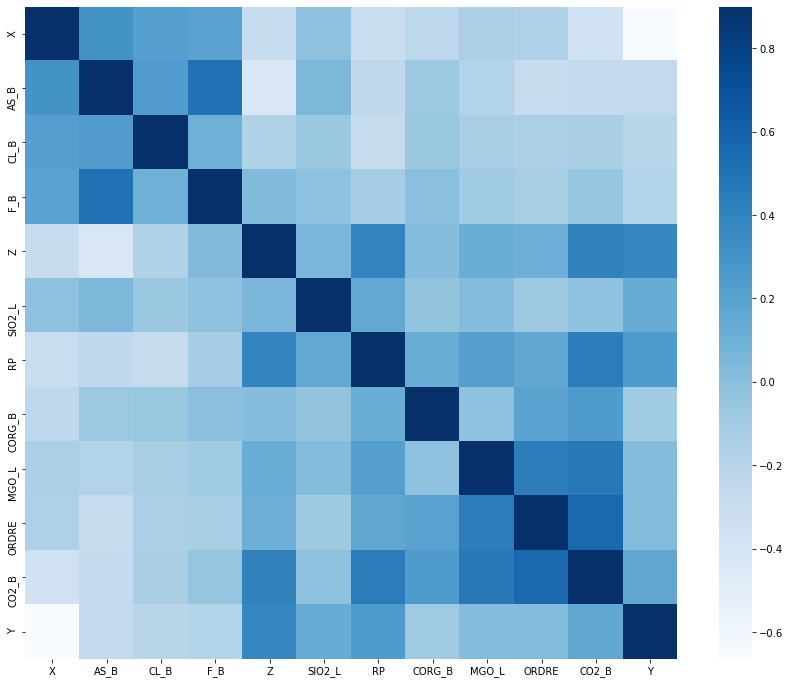

In [ ]:
#correlation map
corr = train_df1[['X','AS_B','CL_B','F_B','Z','SIO2_L','RP','CORG_B','MGO_L','ORDRE','CO2_B','Y']].corr()
plt.subplots(figsize=(15,12))
sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True)

# Dropping some variables

We have noticed that some independant features are more relevant to BPL_B prediction and hence those only will be kept in the dataset to get better models later on

In [ ]:
#drop categorical columns
total = total.drop(['Unnamed: 0','TRANCHE','CMM','CM','MINR_PASSANT','RAPPORT_MIN','OBJECTID','GISEMENT','Th_B','OBS'] , axis=1)
#drop continuous columns
total=total.drop(['PP','K2O_B','ZN_B', 'TI_B','SR_B','Cr_B','CD_L'], axis=1)

# Filling missing values

In [ ]:
total.isna().sum() 

TYPE_         0
NIVEAU        0
ZONE_      1514
X             0
Y             0
Z             0
PT            0
BPL_B      4594
RP            0
CO2_B         0
CAO_B         0
SIO2_B        0
FE2O3_B       0
AL2O3_B       0
F_B           0
CORG_B        0
NA2O_B        0
MGO_B         0
CD_B          0
U_B           0
AS_B          0
V_B           0
TR_B          0
CL_B          0
Mo_B          0
SIO2_L        0
MGO_L         0
CO2_L         0
SO3_B         0
AS_L          0
CL_L          0
SIO2R_B       0
ORDRE         0
dtype: int64

In [ ]:

#fill categorical missing values with most frequent value
total['ZONE_'] = total['ZONE_'].fillna(total['ZONE_'].value_counts().index[0])

In [ ]:
#Checking if there's no missing value 
total.isna().sum() 

TYPE_         0
NIVEAU        0
ZONE_         0
X             0
Y             0
Z             0
PT            0
BPL_B      4594
RP            0
CO2_B         0
CAO_B         0
SIO2_B        0
FE2O3_B       0
AL2O3_B       0
F_B           0
CORG_B        0
NA2O_B        0
MGO_B         0
CD_B          0
U_B           0
AS_B          0
V_B           0
TR_B          0
CL_B          0
Mo_B          0
SIO2_L        0
MGO_L         0
CO2_L         0
SO3_B         0
AS_L          0
CL_L          0
SIO2R_B       0
ORDRE         0
dtype: int64

In [ ]:
#get dummies 
total_d = pd.get_dummies(total, columns=['ZONE_','TYPE_','NIVEAU'])

#Fix skewed features

In this section, we will fix the skewness of the continuous numeric independant variables using the boxcox function

In [ ]:
numeric_features = [ 'Z', 'PT',
        'CAO_B', 'SIO2_B', 'FE2O3_B', 'AL2O3_B', 'F_B', 'CORG_B',
       'NA2O_B', 'MGO_B', 'CD_B', 'U_B', 'AS_B', 'V_B', 'TR_B', 'CL_B', 'Mo_B',
       'SIO2_L', 'MGO_L', 'CO2_L', 'SO3_B', 'AS_L', 'CL_L', 'SIO2R_B']

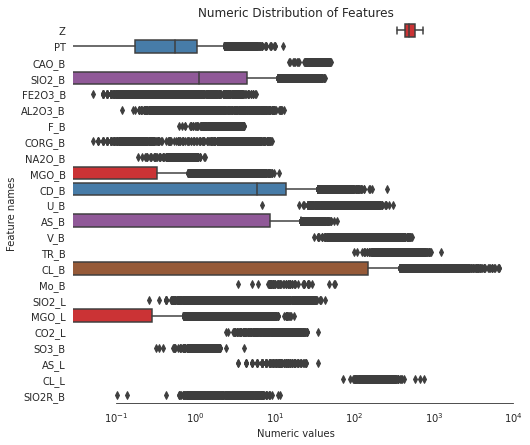

In [ ]:
# Create box plots for all numeric features
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=total[numeric_features] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

In [ ]:
# Find skewed numerical features
skew_features = total[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 1]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features

There are 23 numerical features with Skew > 0.5 :


Mo_B       16.750827
AS_L       10.370265
SIO2R_B     9.257031
AL2O3_B     8.357737
CO2_L       8.317825
FE2O3_B     8.180368
CL_B        8.070418
CL_L        8.043229
SIO2_L      6.662971
CORG_B      6.465488
NA2O_B      6.108100
V_B         6.069290
TR_B        4.345426
MGO_B       4.209219
MGO_L       4.059925
SO3_B       3.769728
CD_B        3.104131
SIO2_B      2.957040
F_B         2.747694
U_B         2.716771
CAO_B       2.624300
PT          2.530135
AS_B        1.829079
Z          -1.496288
dtype: float64

In [ ]:
## Compute the Box-Cox transformation of 1 + x for skewed features

skew_features = skew_features[abs(skew_features) > 0.75]
print("skew_features.shape = ", skew_features.shape)
skewed_features = skew_features.index
lamb = 0.15
for feature in skewed_features:
    total[feature] = boxcox1p(total[feature], lamb)

skew_features.shape =  (24,)


In [ ]:
## Check skewness again

numerical_features = total.dtypes[total.dtypes != "object"].index
skewness_of_features = total[numerical_features].apply(lambda x: 
                            skew(x.dropna())).sort_values(ascending=False)
skewness_df = pd.DataFrame({'Skewness': skewness_of_features})
skewness_df

,Skewness
Mo_B,8.800913
AS_L,8.666193
SIO2R_B,6.962086
CO2_L,6.899150
CL_L,6.514519
NA2O_B,5.928916
FE2O3_B,5.683601
CORG_B,5.427177
AL2O3_B,4.963207
SIO2_L,3.940218


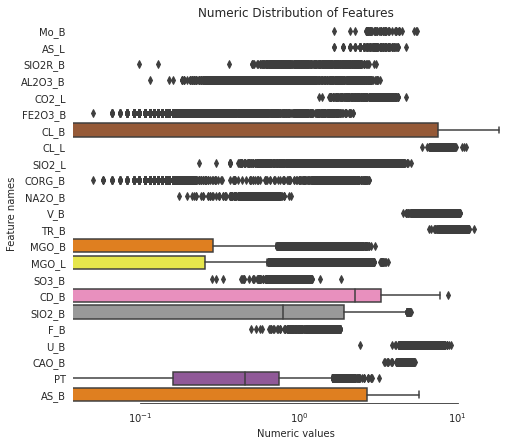

In [ ]:
# Let's make sure we handled all the skewed values
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=total[skew_index] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

#Let's create new train and test

In [ ]:
print(len(train_df))

10716


In [ ]:
new_train = total_d[:10716]
new_test = total_d[10716:]

In [ ]:
new_train.head()

,X,Y,Z,PT,BPL_B,RP,CO2_B,CAO_B,SIO2_B,FE2O3_B,AL2O3_B,F_B,CORG_B,NA2O_B,MGO_B,CD_B,U_B,AS_B,V_B,TR_B,CL_B,Mo_B,SIO2_L,MGO_L,CO2_L,SO3_B,AS_L,CL_L,SIO2R_B,ORDRE,ZONE__Zone1,ZONE__Zone10,ZONE__Zone11,ZONE__Zone12,ZONE__Zone13,ZONE__Zone14,ZONE__Zone15,ZONE__Zone16,ZONE__Zone17,ZONE__Zone18,...,NIVEAU_Niveau 3,NIVEAU_Niveau 30,NIVEAU_Niveau 31,NIVEAU_Niveau 32,NIVEAU_Niveau 33,NIVEAU_Niveau 34,NIVEAU_Niveau 35,NIVEAU_Niveau 36,NIVEAU_Niveau 37,NIVEAU_Niveau 38,NIVEAU_Niveau 39,NIVEAU_Niveau 4,NIVEAU_Niveau 40,NIVEAU_Niveau 41,NIVEAU_Niveau 42,NIVEAU_Niveau 43,NIVEAU_Niveau 44,NIVEAU_Niveau 45,NIVEAU_Niveau 46,NIVEAU_Niveau 47,NIVEAU_Niveau 48,NIVEAU_Niveau 49,NIVEAU_Niveau 5,NIVEAU_Niveau 50,NIVEAU_Niveau 51,NIVEAU_Niveau 52,NIVEAU_Niveau 53,NIVEAU_Niveau 54,NIVEAU_Niveau 55,NIVEAU_Niveau 56,NIVEAU_Niveau 57,NIVEAU_Niveau 58,NIVEAU_Niveau 59,NIVEAU_Niveau 6,NIVEAU_Niveau 60,NIVEAU_Niveau 61,NIVEAU_Niveau 62,NIVEAU_Niveau 7,NIVEAU_Niveau 8,NIVEAU_Niveau 9
0,262872.4336,196575.5013,476.958012,0.514139,57.823479,71.465296,4.224507,25.381320,5.235647,0.214225,0.402742,3.333333,0.0,0.0,0.454156,4.284490,103.684662,9.425878,199.657241,0.0,0.0,0.0,0.0,0.248500,0.0,0.0,0.0,0.0,0.0,5.998286,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,295684.5844,196491.1825,512.956298,0.556984,49.700086,67.514996,7.257926,46.289632,6.246787,0.154242,0.616967,2.887746,0.0,0.0,0.462725,12.853470,110.539846,7.712082,94.258783,0.0,0.0,0.0,0.0,0.334190,0.0,0.0,0.0,0.0,0.0,5.998286,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,275408.0120,196147.3693,470.951157,0.685518,44.027421,60.119966,9.468723,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,7.754927,0.0,0.0,0.0,0.0,0.0,5.998286,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,262872.4336,196575.5013,476.958012,0.257069,46.580977,66.221080,8.449015,23.281919,6.529563,0.162811,0.625536,2.716367,0.0,0.0,1.945159,5.141388,89.117395,7.712082,71.979434,0.0,0.0,0.0,0.0,0.471294,0.0,0.0,0.0,0.0,0.0,9.425878,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,292263.4876,195937.1979,483.033419,0.514139,51.285347,67.009426,5.544130,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,9.425878,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#we drop the column of BPL_B from the dataframa new_test
new_test = new_test.drop(['BPL_B'] , axis=1)

# Testing simple models

We will be testing : linear regression, CART on the processed data

In [ ]:
#linear regression

l=list(new_train.columns)
l.remove('BPL_B')
X_train = new_train[l].values
y_train = new_train['BPL_B'].values

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

#get summary of the linear regression model
from statsmodels.api import OLS
OLS(y_train,sm.add_constant(X_train)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     478.6
Date:                Sun, 27 Dec 2020   Prob (F-statistic):               0.00
Time:                        21:47:11   Log-Likelihood:                -33290.
No. Observations:               10716   AIC:                         6.681e+04
Df Residuals:                   10601   BIC:                         6.765e+04
Df Model:                         114                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.5292      2.889      6.761      0.000      13.867      25.191
x1          8.226e-05   8.96e-06      9.183      0.000    6.47e-05    9.98e-05
x2          -4.11e-06   1.56e-05     -0.263      0.792   -3.47e-05    2.65e-05
x3             0.0021      0.001      3.657      0.000       0.001       0.003
x4            -0.8028      0.091     -8.870      0.000      -0.980      -0.625
x5             0.0285      0.004      7.196      0.000       0.021       0.036
x6            -0.9572      0.019    -50.638      0.000      -0.994      -0.920
x7            -0.1741      0.033     -5.272      0.000      -0.239      -0.109
x8            -0.0745      0.020     -3.638      0.000      -0.115      -0.034
x9            -0.1869      0.683     -0.273      0.785      -1.526       1.153
x10            0.3263      0.313      1.043      0.297      -0.287       0.940
x11            2.3738      0.458      5.182      0.000       1.476       3.272
x12           -0.7464      0.090     -8.280      0.000      -0.923      -0.570
x13            1.9512      0.832      2.347      0.019       0.321       3.581
x14            0.0168      0.079      0.212      0.832      -0.138       0.172
x15           -0.0453      0.005     -8.552      0.000      -0.056      -0.035
x16            0.0203      0.003      6.006      0.000       0.014       0.027
x17            0.0647      0.012      5.463      0.000       0.042       0.088
x18           -0.0072      0.002     -3.711      0.000      -0.011      -0.003
x19            0.0018      0.001      1.576      0.115      -0.000       0.004
x20            0.0015      0.000      7.713      0.000       0.001       0.002
x21           -0.1550      0.049     -3.194      0.001      -0.250      -0.060
x22           -0.3919      0.033    -11.956      0.000      -0.456      -0.328
x23           -0.4040      0.054     -7.482      0.000      -0.510      -0.298
x24           -0.1266      0.031     -4.113      0.000      -0.187      -0.066
x25           -1.3723      0.408     -3.363      0.001      -2.172      -0.572
x26            0.3958      0.047      8.511      0.000       0.305       0.487
x27           -0.0065      0.002     -3.106      0.002      -0.011      -0.002
x28            1.2720      0.125     10.186      0.000       1.027       1.517
x29           -0.2164      0.010    -21.167      0.000      -0.236      -0.196
x30           -1.0537      0.399     -2.642      0.008      -1.835      -0.272
x31            2.8225      0.469      6.016      0.000       1.903       3.742
x32            1.0248      0.580      1.768      0.077      -0.111       2.161
x33            3.8140      0.531      7.188      0.000       2.774       4.854
x34            7.1179      0.607     11.734      0.000       5.929       8.307
x35            5.7868      0.538     10.759      0.000       4.732       6.841
x3

In [ ]:
#calculate rmse on train set
y_pred_linreg = regressor.predict(X_train)

from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_train, y_pred_linreg)))

5.406820767380203


In [ ]:
#Cart model

#first, normalize data

#normalise data


import pandas as pd
from sklearn import preprocessing

my_array = new_train.copy().values #returns a numpy array

min_max_scaler = preprocessing.MinMaxScaler()
my_array_scaled = min_max_scaler.fit_transform(my_array)
scaled_data = pd.DataFrame(my_array_scaled, columns=new_train.columns)


scaled_data['BPL_B'] = new_train['BPL_B']
scaled_data.head()

,X,Y,Z,PT,BPL_B,RP,CO2_B,CAO_B,SIO2_B,FE2O3_B,AL2O3_B,F_B,CORG_B,NA2O_B,MGO_B,CD_B,U_B,AS_B,V_B,TR_B,CL_B,Mo_B,SIO2_L,MGO_L,CO2_L,SO3_B,AS_L,CL_L,SIO2R_B,ORDRE,ZONE__Zone1,ZONE__Zone10,ZONE__Zone11,ZONE__Zone12,ZONE__Zone13,ZONE__Zone14,ZONE__Zone15,ZONE__Zone16,ZONE__Zone17,ZONE__Zone18,...,NIVEAU_Niveau 3,NIVEAU_Niveau 30,NIVEAU_Niveau 31,NIVEAU_Niveau 32,NIVEAU_Niveau 33,NIVEAU_Niveau 34,NIVEAU_Niveau 35,NIVEAU_Niveau 36,NIVEAU_Niveau 37,NIVEAU_Niveau 38,NIVEAU_Niveau 39,NIVEAU_Niveau 4,NIVEAU_Niveau 40,NIVEAU_Niveau 41,NIVEAU_Niveau 42,NIVEAU_Niveau 43,NIVEAU_Niveau 44,NIVEAU_Niveau 45,NIVEAU_Niveau 46,NIVEAU_Niveau 47,NIVEAU_Niveau 48,NIVEAU_Niveau 49,NIVEAU_Niveau 5,NIVEAU_Niveau 50,NIVEAU_Niveau 51,NIVEAU_Niveau 52,NIVEAU_Niveau 53,NIVEAU_Niveau 54,NIVEAU_Niveau 55,NIVEAU_Niveau 56,NIVEAU_Niveau 57,NIVEAU_Niveau 58,NIVEAU_Niveau 59,NIVEAU_Niveau 6,NIVEAU_Niveau 60,NIVEAU_Niveau 61,NIVEAU_Niveau 62,NIVEAU_Niveau 7,NIVEAU_Niveau 8,NIVEAU_Niveau 9
0,0.073449,0.293388,0.656179,0.051282,57.823479,0.859262,0.135106,0.506931,0.126948,0.037425,0.030941,0.829424,0.0,0.0,0.047237,0.016667,0.342776,0.157143,0.386401,0.0,0.0,0.0,0.0,0.014442,0.0,0.0,0.0,0.0,0.0,0.098361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.334355,0.291429,0.705703,0.055556,49.700086,0.811766,0.232118,0.924525,0.151465,0.026946,0.047400,0.718550,0.0,0.0,0.048128,0.050000,0.365439,0.128571,0.182421,0.0,0.0,0.0,0.0,0.019422,0.0,0.0,0.0,0.0,0.0,0.098361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.173126,0.283439,0.647915,0.068376,44.027421,0.722852,0.302823,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.450697,0.0,0.0,0.0,0.0,0.0,0.098361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.073449,0.293388,0.656179,0.025641,46.580977,0.796209,0.270211,0.465001,0.158321,0.028443,0.048058,0.675906,0.0,0.0,0.202317,0.020000,0.294618,0.128571,0.139303,0.0,0.0,0.0,0.0,0.027390,0.0,0.0,0.0,0.0,0.0,0.163934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.307152,0.278555,0.664537,0.051282,51.285347,0.805687,0.177309,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.163934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Build CART Model
from sklearn.tree import DecisionTreeClassifier, export_graphviz,DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth=4,min_samples_leaf=0.1,random_state=3)
rt = dtr.fit(X_train, y_train)
rt

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=0.1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=3, splitter='best')

In [ ]:
#calculate rmse on train set
y_pred_cart = rt.predict(X_train)

from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_train, y_pred_cart)))

7.414527754324752


linear regression has better rmse than cart model, however the values of rmse on the training set are quite large > 5, hence we need more refining. 

#regression model with tensor flow 2.0


Let's try to explore how deep learning models tackle our data, we try the regression model with tensor flow 2.0 and evaluate rmse on train set

In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.4.0


In [ ]:
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)

In [ ]:
input_layer = Input(shape=(X_train_scaled.shape[1],))
dense_layer_1 = Dense(100, activation='relu')(input_layer)
dense_layer_2 = Dense(50, activation='relu')(dense_layer_1)
dense_layer_3 = Dense(25, activation='relu')(dense_layer_2)
output = Dense(1)(dense_layer_3)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])


In [ ]:
#train model

TR = model.fit(X_train, y_train, batch_size=2, epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100
4286/4286 [==============================] - 7s 2ms/step - loss: 1436742.2417 - mean_squared_error: 1436742.2417 - val_loss: 2975.6941 - val_mean_squared_error: 2975.6941
Epoch 2/100
4286/4286 [==============================] - 6s 1ms/step - loss: 30231.9148 - mean_squared_error: 30231.9148 - val_loss: 1876.0890 - val_mean_squared_error: 1876.0890
Epoch 3/100
4286/4286 [==============================] - 6s 1ms/step - loss: 6967.4310 - mean_squared_error: 6967.4310 - val_loss: 1206.5851 - val_mean_squared_error: 1206.5851
Epoch 4/100
4286/4286 [==============================] - 6s 1ms/step - loss: 2443.7649 - mean_squared_error: 2443.7649 - val_loss: 632.7967 - val_mean_squared_error: 632.7967
Epoch 5/100
4286/4286 [==============================] - 6s 1ms/step - loss: 3214.3064 - mean_squared_error: 3214.3064 - val_loss: 534.2722 - val_mean_squared_error: 534.2722
Epoch 6/100
4286/4286 [==============================] - 6s 1ms/step - loss: 347.0957 - mean_squared_error: 347

In [ ]:
#Calculate RMSE

from sklearn.metrics import mean_squared_error
from math import sqrt

pred_train = model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))


13.46439462006149


The rmse found with this model is 13.51 !, even simple regression model appears to be better

# Clustering 



In this section, we will create clusters of data using hierarchical clustering on train data set. Then we will perform a set of models on each of the clusters and upvote the best model. We will finally evaluate results

In our previous notebooks, we tried clustering firstly based on solely X, Y, Z coordinantes. We tried also clustering based on numerical variables without categorical ones. But to keep this final notebook brief, we will tackle only clustering based on all columns of the dataset

In [ ]:
#Normalize data

#We will use the previous scaled_data we normalized with the cart model
#see "testing simple models" section

In [ ]:
#Compute distances
import scipy
from scipy.cluster.hierarchy import linkage, fcluster
from matplotlib import pyplot as plt
import seaborn as sns, pandas as pd

distance_matrix = linkage(scaled_data.iloc[:,scaled_data.columns!='BPL_B'],method='complete',metric='euclidean')

In [ ]:
distance_matrix

array([[1.05610000e+04, 1.05770000e+04, 2.20189219e-03, 2.00000000e+00],
       [9.56800000e+03, 9.67300000e+03, 2.49516601e-03, 2.00000000e+00],
       [1.02890000e+04, 1.03960000e+04, 3.01388504e-03, 2.00000000e+00],
       ...,
       [2.14240000e+04, 2.14260000e+04, 3.25300948e+00, 4.20300000e+03],
       [2.14270000e+04, 2.14280000e+04, 3.39183279e+00, 6.56300000e+03],
       [2.14250000e+04, 2.14290000e+04, 3.59190365e+00, 1.07160000e+04]])

In [ ]:
from sklearn.cluster import AgglomerativeClustering
model_clust = AgglomerativeClustering(distance_threshold=4, n_clusters=None)
model_clust = model_clust.fit(scaled_data.iloc[:,scaled_data.columns != 'BPL_B'])

In [ ]:
# Number of clusters
print(model_clust.n_clusters_)

# Distances between clusters
distances = model_clust.distances_
print(distances.min())

print(distances.max())

330
0.0022018921885785616
115.19225236598426


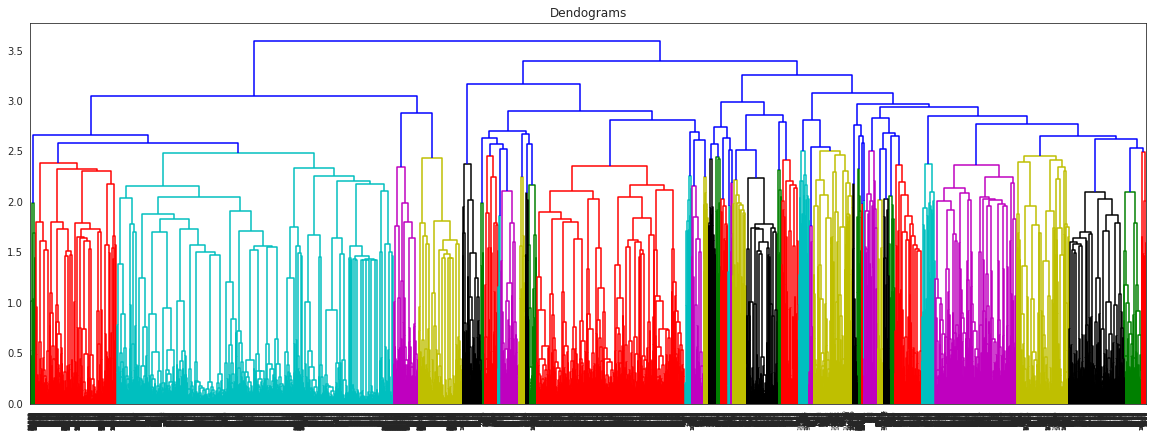

In [ ]:
#create dendogram
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(20,7))
plt.title("Dendograms")
dn = dendrogram(distance_matrix, leaf_rotation=90, leaf_font_size=6)
plt.show()

Based on the dendogram, we choose a number of clusters equal to 8

In [ ]:
#Create cluster labels with fcluster
cluster_labels=fcluster(distance_matrix,8,criterion='maxclust')
print(cluster_labels)

[7 7 7 ... 8 8 8]


In [ ]:
# Display cluster centers 
scaled_data['cluster_labels'] =cluster_labels
mean_clusters=scaled_data.groupby('cluster_labels').mean()
mean_clusters

,X,Y,Z,PT,BPL_B,RP,CO2_B,CAO_B,SIO2_B,FE2O3_B,AL2O3_B,F_B,CORG_B,NA2O_B,MGO_B,CD_B,U_B,AS_B,V_B,TR_B,CL_B,Mo_B,SIO2_L,MGO_L,CO2_L,SO3_B,AS_L,CL_L,SIO2R_B,ORDRE,ZONE__Zone1,ZONE__Zone10,ZONE__Zone11,ZONE__Zone12,ZONE__Zone13,ZONE__Zone14,ZONE__Zone15,ZONE__Zone16,ZONE__Zone17,ZONE__Zone18,...,NIVEAU_Niveau 3,NIVEAU_Niveau 30,NIVEAU_Niveau 31,NIVEAU_Niveau 32,NIVEAU_Niveau 33,NIVEAU_Niveau 34,NIVEAU_Niveau 35,NIVEAU_Niveau 36,NIVEAU_Niveau 37,NIVEAU_Niveau 38,NIVEAU_Niveau 39,NIVEAU_Niveau 4,NIVEAU_Niveau 40,NIVEAU_Niveau 41,NIVEAU_Niveau 42,NIVEAU_Niveau 43,NIVEAU_Niveau 44,NIVEAU_Niveau 45,NIVEAU_Niveau 46,NIVEAU_Niveau 47,NIVEAU_Niveau 48,NIVEAU_Niveau 49,NIVEAU_Niveau 5,NIVEAU_Niveau 50,NIVEAU_Niveau 51,NIVEAU_Niveau 52,NIVEAU_Niveau 53,NIVEAU_Niveau 54,NIVEAU_Niveau 55,NIVEAU_Niveau 56,NIVEAU_Niveau 57,NIVEAU_Niveau 58,NIVEAU_Niveau 59,NIVEAU_Niveau 6,NIVEAU_Niveau 60,NIVEAU_Niveau 61,NIVEAU_Niveau 62,NIVEAU_Niveau 7,NIVEAU_Niveau 8,NIVEAU_Niveau 9
cluster_labels,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.510227,0.371256,0.435185,0.061146,54.181736,0.000000,0.079547,0.000000,0.091710,0.000000,0.000000,0.000000,0.000000,0.000000,0.079064,0.063057,0.006881,0.087312,0.001003,0.000000,0.040373,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004895,0.350668,0.000000,0.000000,0.000000,0.128432,0.05778,0.121568,0.032037,0.000000,0.000000,0.000000,...,0.000000,0.001716,0.002002,0.000000,0.033181,0.000000,0.000000,0.000000,0.000000,0.017735,0.018879,0.00000,0.000000,0.036613,0.000000,0.027174,0.029748,0.066362,0.051487,0.029176,0.034611,0.000000,0.065217,0.0000,0.000000,0.000000,0.00000,0.006293,0.00286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015732,0.000000,0.067506,0.002860
2,0.576411,0.267934,0.636519,0.004163,57.394104,0.000000,0.136096,0.468687,0.080524,0.022378,0.017531,0.470329,0.011002,0.000000,0.027793,0.044962,0.208248,0.242596,0.035545,0.238025,0.063675,0.000000,0.000000,0.000000,0.000000,0.187977,0.000000,0.000000,0.085309,0.225616,0.000000,0.000000,0.000000,0.318113,0.00000,0.000000,0.681887,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.086758,0.036530,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019787,0.0000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.059361,0.000000
3,0.303656,0.801847,0.874335,0.086598,30.554288,0.624499,0.070637,0.005402,0.514217,0.225299,0.217629,0.005977,0.000000,0.000000,0.023699,0.030412,0.001671,0.074238,0.006019,0.000000,0.000000,0.000000,0.391295,0.002012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.123596,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.372253,0.607800,0.798167,0.073708,38.253573,0.657552,0.365330,0.017649,0.031135,0.004654,0.004490,0.012423,0.009593,0.004903,0.027626,0.006220,0.011435,0.016215,0.003528,0.004616,0.001285,0.002329,0.010282,0.089195,0.026929,0.001633,0.007298,0.003126,0.000000,0.622395,0.076077,0.020623,0.040330,0.000000,0.00000,0.000000,0.000000,0.058203,0.002291,0.000000,...,0.000000,0.000000,0.029331,0.000000,0.000000,0.000000,0.000000,0.060037,0.040330,0.000000,0.000000,0.00000,0.028414,0.000000,0.022915,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052246,0.0000,0.014207,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.016499,0.015124,0.007791,0.000000,0.000000,0.000000,0.000000,0.044913,0.031622
5,0.543014,0.353082,0.667996,0.091004,55.558449,0.4040

In [ ]:
data = new_train.copy()
data['cluster_labels'] =cluster_labels
data.head()

,X,Y,Z,PT,BPL_B,RP,CO2_B,CAO_B,SIO2_B,FE2O3_B,AL2O3_B,F_B,CORG_B,NA2O_B,MGO_B,CD_B,U_B,AS_B,V_B,TR_B,CL_B,Mo_B,SIO2_L,MGO_L,CO2_L,SO3_B,AS_L,CL_L,SIO2R_B,ORDRE,ZONE__Zone1,ZONE__Zone10,ZONE__Zone11,ZONE__Zone12,ZONE__Zone13,ZONE__Zone14,ZONE__Zone15,ZONE__Zone16,ZONE__Zone17,ZONE__Zone18,...,NIVEAU_Niveau 30,NIVEAU_Niveau 31,NIVEAU_Niveau 32,NIVEAU_Niveau 33,NIVEAU_Niveau 34,NIVEAU_Niveau 35,NIVEAU_Niveau 36,NIVEAU_Niveau 37,NIVEAU_Niveau 38,NIVEAU_Niveau 39,NIVEAU_Niveau 4,NIVEAU_Niveau 40,NIVEAU_Niveau 41,NIVEAU_Niveau 42,NIVEAU_Niveau 43,NIVEAU_Niveau 44,NIVEAU_Niveau 45,NIVEAU_Niveau 46,NIVEAU_Niveau 47,NIVEAU_Niveau 48,NIVEAU_Niveau 49,NIVEAU_Niveau 5,NIVEAU_Niveau 50,NIVEAU_Niveau 51,NIVEAU_Niveau 52,NIVEAU_Niveau 53,NIVEAU_Niveau 54,NIVEAU_Niveau 55,NIVEAU_Niveau 56,NIVEAU_Niveau 57,NIVEAU_Niveau 58,NIVEAU_Niveau 59,NIVEAU_Niveau 6,NIVEAU_Niveau 60,NIVEAU_Niveau 61,NIVEAU_Niveau 62,NIVEAU_Niveau 7,NIVEAU_Niveau 8,NIVEAU_Niveau 9,cluster_labels
0,262872.4336,196575.5013,476.958012,0.514139,57.823479,71.465296,4.224507,25.381320,5.235647,0.214225,0.402742,3.333333,0.0,0.0,0.454156,4.284490,103.684662,9.425878,199.657241,0.0,0.0,0.0,0.0,0.248500,0.0,0.0,0.0,0.0,0.0,5.998286,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7
1,295684.5844,196491.1825,512.956298,0.556984,49.700086,67.514996,7.257926,46.289632,6.246787,0.154242,0.616967,2.887746,0.0,0.0,0.462725,12.853470,110.539846,7.712082,94.258783,0.0,0.0,0.0,0.0,0.334190,0.0,0.0,0.0,0.0,0.0,5.998286,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7
2,275408.0120,196147.3693,470.951157,0.685518,44.027421,60.119966,9.468723,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,7.754927,0.0,0.0,0.0,0.0,0.0,5.998286,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7
3,262872.4336,196575.5013,476.958012,0.257069,46.580977,66.221080,8.449015,23.281919,6.529563,0.162811,0.625536,2.716367,0.0,0.0,1.945159,5.141388,89.117395,7.712082,71.979434,0.0,0.0,0.0,0.0,0.471294,0.0,0.0,0.0,0.0,0.0,9.425878,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
4,292263.4876,195937.1979,483.033419,0.514139,51.285347,67.009426,5.544130,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,9.425878,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8


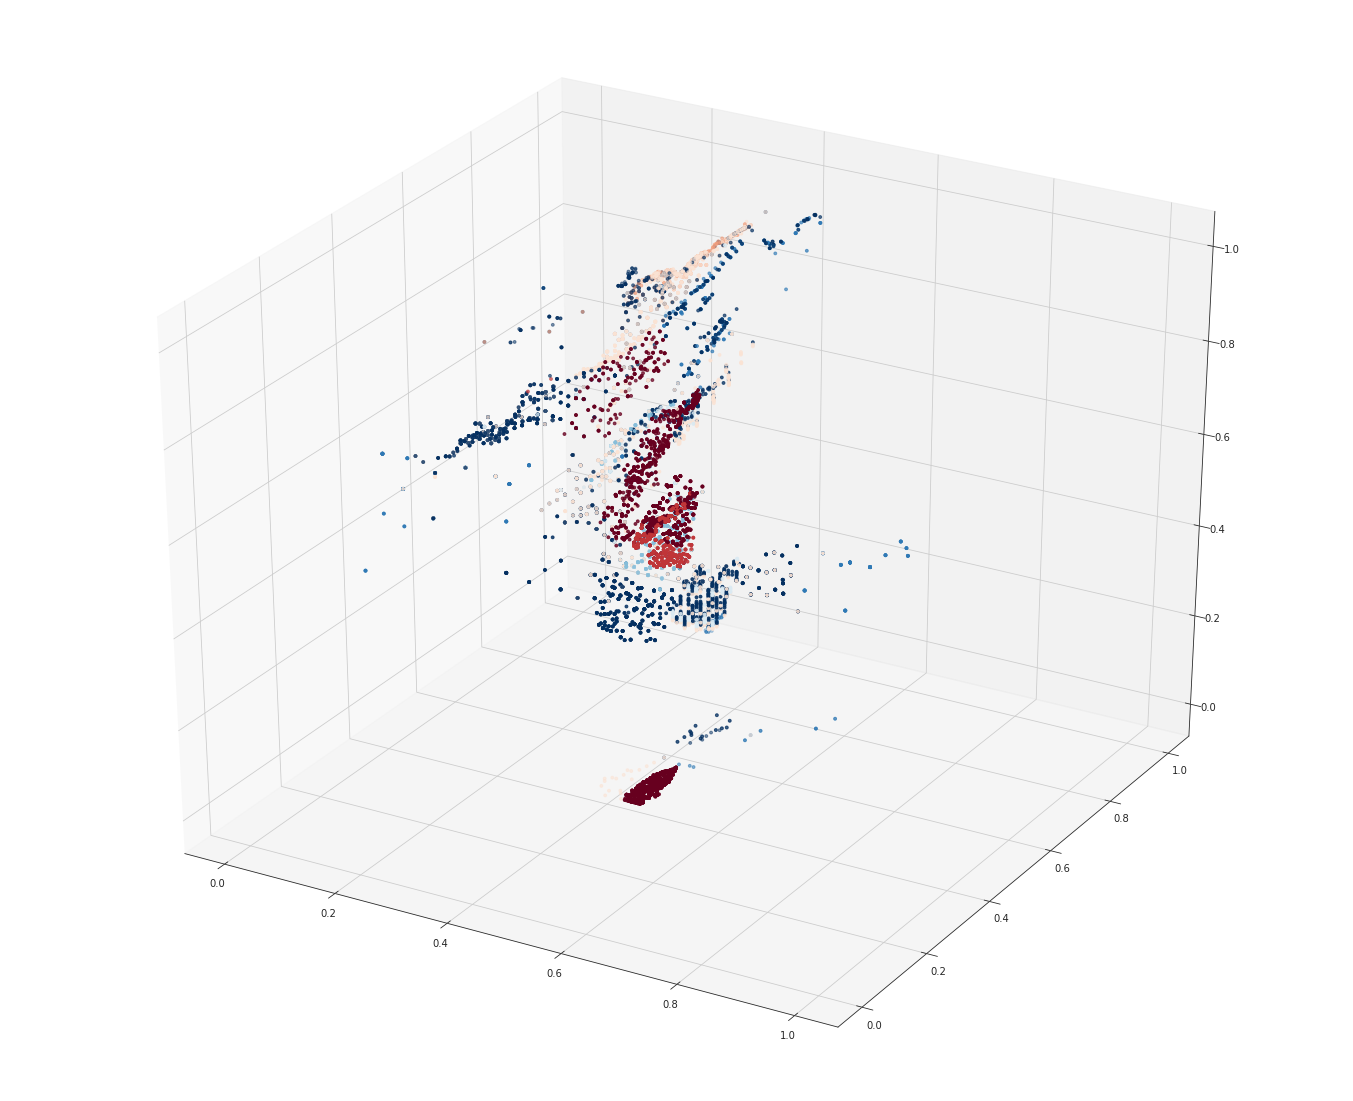

In [ ]:
#visualise clusters

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np

fig = plt.figure(figsize=(24,20))
ax = fig.add_subplot(111, projection='3d')
x = np.array(scaled_data['X'])
y = np.array(scaled_data['Y'])
z = np.array(scaled_data['Z'])

ax.scatter(x,y,z, marker="o", c=data["cluster_labels"], s=8, cmap="RdBu")

plt.show()

#perform linear regression model on clusters

In this section, we will fit a linear regression model on each cluster and evaluate results

In [ ]:
#split data to train and test randomly ( keep dataframe format )
train = data.sample(frac=0.7,random_state=200)
test=data.drop(train.index).copy()
train.head()

,X,Y,Z,PT,BPL_B,RP,CO2_B,CAO_B,SIO2_B,FE2O3_B,AL2O3_B,F_B,CORG_B,NA2O_B,MGO_B,CD_B,U_B,AS_B,V_B,TR_B,CL_B,Mo_B,SIO2_L,MGO_L,CO2_L,SO3_B,AS_L,CL_L,SIO2R_B,ORDRE,ZONE__Zone1,ZONE__Zone10,ZONE__Zone11,ZONE__Zone12,ZONE__Zone13,ZONE__Zone14,ZONE__Zone15,ZONE__Zone16,ZONE__Zone17,ZONE__Zone18,...,NIVEAU_Niveau 30,NIVEAU_Niveau 31,NIVEAU_Niveau 32,NIVEAU_Niveau 33,NIVEAU_Niveau 34,NIVEAU_Niveau 35,NIVEAU_Niveau 36,NIVEAU_Niveau 37,NIVEAU_Niveau 38,NIVEAU_Niveau 39,NIVEAU_Niveau 4,NIVEAU_Niveau 40,NIVEAU_Niveau 41,NIVEAU_Niveau 42,NIVEAU_Niveau 43,NIVEAU_Niveau 44,NIVEAU_Niveau 45,NIVEAU_Niveau 46,NIVEAU_Niveau 47,NIVEAU_Niveau 48,NIVEAU_Niveau 49,NIVEAU_Niveau 5,NIVEAU_Niveau 50,NIVEAU_Niveau 51,NIVEAU_Niveau 52,NIVEAU_Niveau 53,NIVEAU_Niveau 54,NIVEAU_Niveau 55,NIVEAU_Niveau 56,NIVEAU_Niveau 57,NIVEAU_Niveau 58,NIVEAU_Niveau 59,NIVEAU_Niveau 6,NIVEAU_Niveau 60,NIVEAU_Niveau 61,NIVEAU_Niveau 62,NIVEAU_Niveau 7,NIVEAU_Niveau 8,NIVEAU_Niveau 9,cluster_labels
8210,322752.3565,191283.5304,364.952871,3.513282,48.748929,64.104542,8.037704,0.0,0.000000,0.000000,0.000000,0.0,0.239931,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,35.132819,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
6781,344230.4542,192802.0566,419.108826,1.242502,59.957155,76.958012,3.299057,0.0,5.244216,0.531277,0.788346,0.0,0.000000,0.0,0.454156,10.059983,56.692374,30.488432,0.0,0.0,0.0,0.0,2.999143,0.299914,0.0,0.0,0.0,0.0,0.0,5.998286,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
5393,276262.2108,200592.1165,494.430163,0.556984,23.556127,34.387318,18.551842,0.0,0.000000,0.000000,0.000000,0.0,2.425021,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,10.282776,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
130,315574.9786,192700.9426,409.340189,0.814053,57.197943,66.683805,3.590403,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.231362,0.0,0.0,0.0,0.0,0.0,9.425878,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
5272,288126.1525,223872.4850,0.000000,0.771208,33.333333,34.421594,1.096829,0.0,27.309340,2.365039,5.535561,0.0,0.000000,0.0,0.402742,18.449015,0.000000,6.769494,0.0,0.0,0.0,0.0,15.055698,0.000000,0.0,0.0,0.0,0.0,0.0,0.856898,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7


In [ ]:
#create a list of datasets, each dataset corresponding to elements of one cluster in the training set
train_list = [train[train['cluster_labels']==i] for i in range(1,9)]
train_list[1].head()

,X,Y,Z,PT,BPL_B,RP,CO2_B,CAO_B,SIO2_B,FE2O3_B,AL2O3_B,F_B,CORG_B,NA2O_B,MGO_B,CD_B,U_B,AS_B,V_B,TR_B,CL_B,Mo_B,SIO2_L,MGO_L,CO2_L,SO3_B,AS_L,CL_L,SIO2R_B,ORDRE,ZONE__Zone1,ZONE__Zone10,ZONE__Zone11,ZONE__Zone12,ZONE__Zone13,ZONE__Zone14,ZONE__Zone15,ZONE__Zone16,ZONE__Zone17,ZONE__Zone18,...,NIVEAU_Niveau 30,NIVEAU_Niveau 31,NIVEAU_Niveau 32,NIVEAU_Niveau 33,NIVEAU_Niveau 34,NIVEAU_Niveau 35,NIVEAU_Niveau 36,NIVEAU_Niveau 37,NIVEAU_Niveau 38,NIVEAU_Niveau 39,NIVEAU_Niveau 4,NIVEAU_Niveau 40,NIVEAU_Niveau 41,NIVEAU_Niveau 42,NIVEAU_Niveau 43,NIVEAU_Niveau 44,NIVEAU_Niveau 45,NIVEAU_Niveau 46,NIVEAU_Niveau 47,NIVEAU_Niveau 48,NIVEAU_Niveau 49,NIVEAU_Niveau 5,NIVEAU_Niveau 50,NIVEAU_Niveau 51,NIVEAU_Niveau 52,NIVEAU_Niveau 53,NIVEAU_Niveau 54,NIVEAU_Niveau 55,NIVEAU_Niveau 56,NIVEAU_Niveau 57,NIVEAU_Niveau 58,NIVEAU_Niveau 59,NIVEAU_Niveau 6,NIVEAU_Niveau 60,NIVEAU_Niveau 61,NIVEAU_Niveau 62,NIVEAU_Niveau 7,NIVEAU_Niveau 8,NIVEAU_Niveau 9,cluster_labels
9152,326822.6221,197591.2682,487.317909,0.0,65.029991,0.0,3.598972,0.000000,2.742074,0.000000,0.000000,0.000000,0.000000,0.0,0.265638,12.853470,0.000000,0.000000,0.0,0.000000,299.914310,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,13.710368,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
10371,332501.9280,194294.8500,445.072836,0.0,61.610968,0.0,1.979434,43.607541,2.810626,0.539846,0.411311,3.324764,0.137104,0.0,0.334190,3.427592,107.969152,26.563839,0.0,363.324764,767.780634,0.0,0.0,0.0,0.0,1.319623,0.0,0.0,0.000000,3.427592,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
8843,322735.6470,195009.6829,452.099400,0.0,55.329906,0.0,6.812339,0.000000,5.347044,0.000000,0.000000,0.000000,0.000000,0.0,0.222793,47.129392,0.000000,16.281063,0.0,0.000000,166.238218,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,3.007712,5.998286,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
9136,275030.8655,210983.2648,496.795201,0.0,60.668380,0.0,3.864610,43.727506,2.776350,0.137104,0.334190,3.453299,0.188518,0.0,0.239931,5.998286,108.826050,24.850043,0.0,371.893745,342.759212,0.0,0.0,0.0,0.0,1.628106,0.0,0.0,0.000000,13.710368,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
9039,326628.1063,194286.3410,439.742931,0.0,51.585261,0.0,5.972579,0.000000,7.266495,0.000000,0.000000,0.000000,0.000000,0.0,0.265638,23.993145,0.000000,15.424165,0.0,0.000000,247.643530,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,4.361611,8.568980,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [ ]:
#train lin reg model on each cluster label dataset

#building the linear regressor for each cluster
list_y_test_pred = []
list_regressors = []
for i in range(8):

  l=list(train_list[i].columns)
  l.remove('BPL_B')
  X = train_list[i][l].values
  y = train_list[i]['BPL_B'].values


  regressor = LinearRegression() 
  regressor.fit(X, y) 
  list_regressors.append(regressor)

test_list = [test[test['cluster_labels']==i] for i in range(1,9)]

#define X_test and y_test
m=list(test.columns)
m.remove('BPL_B')
X_test = test[m]
y_test = test['BPL_B'].values


#predict y according to cluster label
y_test_pred = []

#iterate through each row
for index, row in X_test.iterrows():
  line = np.array(row).reshape(1,-1)
  y_test_pred.append(list_regressors[int(row['cluster_labels']-1)].predict(line))
  

#calculate rmse on testing set

from sklearn import metrics

print(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))


4.802910012377896


#perform cart on clusters

In [ ]:
scaled_data['cluster_labels'] = data['cluster_labels']
scaled_data.head()

,X,Y,Z,PT,BPL_B,RP,CO2_B,CAO_B,SIO2_B,FE2O3_B,AL2O3_B,F_B,CORG_B,NA2O_B,MGO_B,CD_B,U_B,AS_B,V_B,TR_B,CL_B,Mo_B,SIO2_L,MGO_L,CO2_L,SO3_B,AS_L,CL_L,SIO2R_B,ORDRE,ZONE__Zone1,ZONE__Zone10,ZONE__Zone11,ZONE__Zone12,ZONE__Zone13,ZONE__Zone14,ZONE__Zone15,ZONE__Zone16,ZONE__Zone17,ZONE__Zone18,...,NIVEAU_Niveau 30,NIVEAU_Niveau 31,NIVEAU_Niveau 32,NIVEAU_Niveau 33,NIVEAU_Niveau 34,NIVEAU_Niveau 35,NIVEAU_Niveau 36,NIVEAU_Niveau 37,NIVEAU_Niveau 38,NIVEAU_Niveau 39,NIVEAU_Niveau 4,NIVEAU_Niveau 40,NIVEAU_Niveau 41,NIVEAU_Niveau 42,NIVEAU_Niveau 43,NIVEAU_Niveau 44,NIVEAU_Niveau 45,NIVEAU_Niveau 46,NIVEAU_Niveau 47,NIVEAU_Niveau 48,NIVEAU_Niveau 49,NIVEAU_Niveau 5,NIVEAU_Niveau 50,NIVEAU_Niveau 51,NIVEAU_Niveau 52,NIVEAU_Niveau 53,NIVEAU_Niveau 54,NIVEAU_Niveau 55,NIVEAU_Niveau 56,NIVEAU_Niveau 57,NIVEAU_Niveau 58,NIVEAU_Niveau 59,NIVEAU_Niveau 6,NIVEAU_Niveau 60,NIVEAU_Niveau 61,NIVEAU_Niveau 62,NIVEAU_Niveau 7,NIVEAU_Niveau 8,NIVEAU_Niveau 9,cluster_labels
0,0.073449,0.293388,0.656179,0.051282,57.823479,0.859262,0.135106,0.506931,0.126948,0.037425,0.030941,0.829424,0.0,0.0,0.047237,0.016667,0.342776,0.157143,0.386401,0.0,0.0,0.0,0.0,0.014442,0.0,0.0,0.0,0.0,0.0,0.098361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
1,0.334355,0.291429,0.705703,0.055556,49.700086,0.811766,0.232118,0.924525,0.151465,0.026946,0.047400,0.718550,0.0,0.0,0.048128,0.050000,0.365439,0.128571,0.182421,0.0,0.0,0.0,0.0,0.019422,0.0,0.0,0.0,0.0,0.0,0.098361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
2,0.173126,0.283439,0.647915,0.068376,44.027421,0.722852,0.302823,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.450697,0.0,0.0,0.0,0.0,0.0,0.098361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
3,0.073449,0.293388,0.656179,0.025641,46.580977,0.796209,0.270211,0.465001,0.158321,0.028443,0.048058,0.675906,0.0,0.0,0.202317,0.020000,0.294618,0.128571,0.139303,0.0,0.0,0.0,0.0,0.027390,0.0,0.0,0.0,0.0,0.0,0.163934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
4,0.307152,0.278555,0.664537,0.051282,51.285347,0.805687,0.177309,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.163934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8


In [ ]:
#split scaled data to train and test randomly ( keep dataframe format )
scaled_train = scaled_data.sample(frac=0.7,random_state=200)
scaled_test=scaled_data.drop(train.index).copy()
scaled_train.head()

,X,Y,Z,PT,BPL_B,RP,CO2_B,CAO_B,SIO2_B,FE2O3_B,AL2O3_B,F_B,CORG_B,NA2O_B,MGO_B,CD_B,U_B,AS_B,V_B,TR_B,CL_B,Mo_B,SIO2_L,MGO_L,CO2_L,SO3_B,AS_L,CL_L,SIO2R_B,ORDRE,ZONE__Zone1,ZONE__Zone10,ZONE__Zone11,ZONE__Zone12,ZONE__Zone13,ZONE__Zone14,ZONE__Zone15,ZONE__Zone16,ZONE__Zone17,ZONE__Zone18,...,NIVEAU_Niveau 30,NIVEAU_Niveau 31,NIVEAU_Niveau 32,NIVEAU_Niveau 33,NIVEAU_Niveau 34,NIVEAU_Niveau 35,NIVEAU_Niveau 36,NIVEAU_Niveau 37,NIVEAU_Niveau 38,NIVEAU_Niveau 39,NIVEAU_Niveau 4,NIVEAU_Niveau 40,NIVEAU_Niveau 41,NIVEAU_Niveau 42,NIVEAU_Niveau 43,NIVEAU_Niveau 44,NIVEAU_Niveau 45,NIVEAU_Niveau 46,NIVEAU_Niveau 47,NIVEAU_Niveau 48,NIVEAU_Niveau 49,NIVEAU_Niveau 5,NIVEAU_Niveau 50,NIVEAU_Niveau 51,NIVEAU_Niveau 52,NIVEAU_Niveau 53,NIVEAU_Niveau 54,NIVEAU_Niveau 55,NIVEAU_Niveau 56,NIVEAU_Niveau 57,NIVEAU_Niveau 58,NIVEAU_Niveau 59,NIVEAU_Niveau 6,NIVEAU_Niveau 60,NIVEAU_Niveau 61,NIVEAU_Niveau 62,NIVEAU_Niveau 7,NIVEAU_Niveau 8,NIVEAU_Niveau 9,cluster_labels
8210,0.549585,0.170407,0.502087,0.350427,48.748929,0.770760,0.257057,0.0,0.000000,0.000000,0.000000,0.0,0.027451,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.655738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
6781,0.720368,0.205696,0.576592,0.123932,59.957155,0.925304,0.105508,0.0,0.127156,0.092814,0.060566,0.0,0.000000,0.0,0.047237,0.039133,0.187422,0.508286,0.0,0.0,0.0,0.0,0.079618,0.017430,0.0,0.0,0.0,0.0,0.0,0.098361,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
5393,0.179918,0.386731,0.680216,0.055556,23.556127,0.413456,0.593313,0.0,0.000000,0.000000,0.000000,0.0,0.277451,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.180328,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
130,0.492514,0.203347,0.563153,0.081197,57.197943,0.801772,0.114826,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.013446,0.0,0.0,0.0,0.0,0.0,0.163934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
5272,0.274254,0.927749,0.000000,0.076923,33.333333,0.413868,0.035078,0.0,0.662165,0.413174,0.425280,0.0,0.000000,0.0,0.041889,0.071767,0.000000,0.112857,0.0,0.0,0.0,0.0,0.399682,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7


In [ ]:
#create a list of datasets, each dataset corresponding to elements of one cluster in the training set
scaled_train_list = [scaled_train[scaled_train['cluster_labels']==i] for i in range(1,9)]
scaled_train_list[1].head()

,X,Y,Z,PT,BPL_B,RP,CO2_B,CAO_B,SIO2_B,FE2O3_B,AL2O3_B,F_B,CORG_B,NA2O_B,MGO_B,CD_B,U_B,AS_B,V_B,TR_B,CL_B,Mo_B,SIO2_L,MGO_L,CO2_L,SO3_B,AS_L,CL_L,SIO2R_B,ORDRE,ZONE__Zone1,ZONE__Zone10,ZONE__Zone11,ZONE__Zone12,ZONE__Zone13,ZONE__Zone14,ZONE__Zone15,ZONE__Zone16,ZONE__Zone17,ZONE__Zone18,...,NIVEAU_Niveau 30,NIVEAU_Niveau 31,NIVEAU_Niveau 32,NIVEAU_Niveau 33,NIVEAU_Niveau 34,NIVEAU_Niveau 35,NIVEAU_Niveau 36,NIVEAU_Niveau 37,NIVEAU_Niveau 38,NIVEAU_Niveau 39,NIVEAU_Niveau 4,NIVEAU_Niveau 40,NIVEAU_Niveau 41,NIVEAU_Niveau 42,NIVEAU_Niveau 43,NIVEAU_Niveau 44,NIVEAU_Niveau 45,NIVEAU_Niveau 46,NIVEAU_Niveau 47,NIVEAU_Niveau 48,NIVEAU_Niveau 49,NIVEAU_Niveau 5,NIVEAU_Niveau 50,NIVEAU_Niveau 51,NIVEAU_Niveau 52,NIVEAU_Niveau 53,NIVEAU_Niveau 54,NIVEAU_Niveau 55,NIVEAU_Niveau 56,NIVEAU_Niveau 57,NIVEAU_Niveau 58,NIVEAU_Niveau 59,NIVEAU_Niveau 6,NIVEAU_Niveau 60,NIVEAU_Niveau 61,NIVEAU_Niveau 62,NIVEAU_Niveau 7,NIVEAU_Niveau 8,NIVEAU_Niveau 9,cluster_labels
9152,0.581949,0.316994,0.670431,0.0,65.029991,0.0,0.115100,0.000000,0.066487,0.000000,0.000000,0.000000,0.000000,0.0,0.027629,0.050000,0.000000,0.000000,0.0,0.000000,0.050909,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.245902,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
10371,0.627108,0.240388,0.612312,0.0,61.610968,0.0,0.063305,0.870957,0.068149,0.094311,0.031600,0.827292,0.015686,0.0,0.034759,0.013333,0.356941,0.442857,0.0,0.397749,0.130327,0.0,0.0,0.0,0.0,0.325581,0.0,0.0,0.000000,0.049180,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
8843,0.549452,0.257000,0.621979,0.0,55.329906,0.0,0.217868,0.000000,0.129649,0.000000,0.000000,0.000000,0.000000,0.0,0.023173,0.183333,0.000000,0.271429,0.0,0.000000,0.028218,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.260579,0.098361,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
9136,0.170127,0.628214,0.683470,0.0,60.668380,0.0,0.123596,0.873353,0.067318,0.023952,0.025675,0.859275,0.021569,0.0,0.024955,0.023333,0.359773,0.414286,0.0,0.407129,0.058182,0.0,0.0,0.0,0.0,0.401691,0.0,0.0,0.000000,0.245902,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
9039,0.580403,0.240190,0.604980,0.0,51.585261,0.0,0.191011,0.000000,0.176189,0.000000,0.000000,0.000000,0.000000,0.0,0.027629,0.093333,0.000000,0.257143,0.0,0.000000,0.042036,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.377877,0.147541,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [ ]:
#train cart model on each cluster label dataset

#building the cart model for each cluster
list_y_test_pred_cart = []
list_models = []
for i in range(8):

  l=list(scaled_train_list[i].columns)
  l.remove('BPL_B')

  X = scaled_train_list[i][l].values
  y = scaled_train_list[i]['BPL_B'].values

  dtr = DecisionTreeRegressor(max_depth=4,min_samples_leaf=0.1,random_state=3)
  rt = dtr.fit(X, y)
  list_models.append(rt)


scaled_test_list = [scaled_test[scaled_test['cluster_labels']==i] for i in range(1,9)]

#define X_test and y_test
m=list(scaled_test.columns)
m.remove('BPL_B')

X_test = scaled_test[m]
y_test = scaled_test['BPL_B'].values


#predict y according to cluster label

#iterate through each row
for index, row in X_test.iterrows():
  list_y_test_pred_cart.append(list_models[int(row['cluster_labels']-1)].predict(line))
  

#calculate rmse on testing set

from sklearn import metrics

print(np.sqrt(metrics.mean_squared_error(y_test, list_y_test_pred_cart)))

18.169288797452797


linear regression performed on clusters proved to be the best model so far. Let's keep exploring other models like xgboost and further analysis like hyperparameters tuning and blending

# Other models

In [ ]:
# Essentials
import numpy as np
import pandas as pd
import datetime
import random

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000



In [ ]:
#define train and test values

l=list(new_train.columns)
l.remove('BPL_B')


X_train = new_train[l].values
y_train = new_train['BPL_B'].values

X_test = new_test.values

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

our models


In [ ]:
# Setup cross validation folds
kf = KFold(n_splits=12, random_state=42, shuffle=True)

In [ ]:
# Light Gradient Boosting Regressor
lightgbm = LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.01, 
                       n_estimators=7000,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=42)

# XGBoost Regressor
xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators=7000,
                       max_depth=5,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:linear',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)

# Ridge Regressor
ridge_alphas = [1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100]
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=ridge_alphas, cv=kf))

# Support Vector Regressor
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42)  

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=1200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42)

# Stack up all the models above, optimized using xgboost
stack_gen = StackingCVRegressor(regressors=(xgboost, lightgbm, svr, ridge, gbr, rf),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

In [ ]:
list_models = ['stack_gen','lightgbm','xgboost','Svr','Ridge','RandomForest','GradientBoosting']

In [ ]:
#fit models

print('stack_gen')
stack_gen_model = stack_gen.fit(X_train, y_train)
y_pred_1 = stack_gen_model.predict(X_train)

stack_gen
[22:13:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:16:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:19:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
#this list contains train rmse of each model
list_rmse = []

In [ ]:
from sklearn.metrics import mean_squared_error as MSE

# Compute train-set MSE
mse = MSE(y_train, y_pred_1)
rmse = mse**(1/2)

list_rmse.append(rmse)

In [ ]:
print('lightgbm')
lgb_model = lightgbm.fit(X_train, y_train)
y_pred_2 = lgb_model.predict(X_train)

In [ ]:
# Compute train-set MSE
mse = MSE(y_train, y_pred_2)
rmse = mse**(1/2)

list_rmse.append(rmse)

In [ ]:
print('xgboost')
xgb_model = xgboost.fit(X_train, y_train)
y_pred_3 = xgb_model.predict(X_train)

In [ ]:
# Compute train-set MSE
mse = MSE(y_train, y_pred_3)
rmse = mse**(1/2)

list_rmse.append(rmse)

In [ ]:
print('Svr')
svr_model = svr.fit(X_train, y_train)
y_pred_4 = svr_model.predict(X_train)

In [ ]:
# Compute train-set MSE
mse = MSE(y_train, y_pred_4)
rmse = mse**(1/2)

list_rmse.append(rmse)

In [ ]:
print('Ridge')
ridge_model = ridge.fit(X_train, y_train)
y_pred_5 = ridge_model.predict(X_train)

In [ ]:
# Compute train-set MSE
mse = MSE(y_train, y_pred_5)
rmse = mse**(1/2)

list_rmse.append(rmse)

In [ ]:
print('RandomForest')
rf_model = rf.fit(X_train, y_train)
y_pred_6 = rf_model.predict(X_train)

In [ ]:
# Compute train-set MSE
mse = MSE(y_train, y_pred_6)
rmse = mse**(1/2)

list_rmse.append(rmse)

In [ ]:
print('GradientBoosting')
gbr_model = gbr.fit(X_train, y_train)
y_pred_7 = gbr_model.predict(X_train)

#xgboost hyperparameters tuning


We will do some parameters tuning by ploting different rmse values for different parameters of xgboost model and choosing the best values

Let's visualize firstly different rmse values of the models mentionned before

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(list_models, list_rmse,  color="darkred",marker="o")

In [ ]:
#tuning n-estimators

results = []
n_estimaor_options = [7000,8000,9000]
for trees in n_estimaor_options:
    model = XGBRegressor( learning_rate=0.01,
                       n_estimators=trees,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:linear',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)
    XGB_model = model.fit(X_train, y_train)
    y_predicted = XGB_model.predict(X_test)
    # Compute train-set MSE
    mse = MSE(y_test, y_predicted)
    # Compute test-set RMSE
    rmse = mse**(1/2)
    # Print rmse_dt
    print(rmse)
    results.append(rmse)


plt.figure(figsize=(8,4))
pd.Series(results, n_estimaor_options).plot(color="darkred",marker="o")
print(results)

In [ ]:
#tuning learning_rate

results = []
learning_rate = [0.0025,0.005,0.01,0.02,0.03]
for rate in learning_rate:
    model = XGBRegressor( learning_rate=rate,
                       n_estimators=7000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:linear',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)
    XGB_model = model.fit(X_train, y_train)
    y_predicted = XGB_model.predict(X_test)
    # Compute train-set MSE
    mse = MSE(y_test, y_predicted)
    # Compute test-set RMSE
    rmse = mse**(1/2)
    # Print rmse_dt
    print(rmse)
    results.append(rmse)


plt.figure(figsize=(8,4))
pd.Series(results, learning_rate).plot(color="darkred",marker="o")
print(results)

In [ ]:
#tuning max_depth

results = []
max = [2,3,4,5,6]
for depth in max:
    model = XGBRegressor( learning_rate=rate,
                       n_estimators=7000,
                       max_depth=depth,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:linear',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)
    XGB_model = model.fit(X_train, y_train)
    y_predicted = XGB_model.predict(X_test)
    # Compute train-set MSE
    mse = MSE(y_test, y_predicted)
    # Compute test-set RMSE
    rmse = mse**(1/2)
    # Print rmse_dt
    print(rmse)
    results.append(rmse)




In [ ]:
plt.figure(figsize=(8,4))
pd.Series(results, max).plot(color="darkred",marker="o")
print(results)

# Blending

In this final section, we will try blending different models into one. We will be introducing our last predicted values as linear combination of different models

Let's try different combinations and evaluate results

In [ ]:
def blended_predictions1(X):
    return ((0.4 * xgb_model.predict(X)) + \
            (0.6 * stack_gen_model.predict(np.array(X))))

In [ ]:
(MSE(y_train, blended_predictions1(X_train)))**(1/2)
               

In [ ]:
def blended_predictions2(X):
    return ((0.1 * ridge_model.predict(X)) + \
            (0.2 * svr_model.predict(X)) + \
            (0.1 * gbr_model.predict(X)) + \
            (0.1 * xgb_model.predict(X)) + \
            (0.1 * lgb_model.predict(X)) + \
            (0.05 * rf_model.predict(X)) + \
            (0.35 * stack_gen_model.predict(np.array(X))))

In [ ]:
(MSE(y_train, blended_predictions2(X_train)))**(1/2)

In the code below, we introduce a loop that iterates through all possible combinations with coefficients ranging from 0 to 1, in each iteration we calculate the rmse on the training set

Eventually the code returns the smallest rmse alongside the appropriate coefficients

In [ ]:
list_rmse_coeff3 = []
list_rmse3 = []
    
for i in range (11):
  for j in range(11):
    for k in range(11):
      for l in range(11) :
        for m in range(11) :
          for n in range(11) :
            for o in range(11) :
            
              if i + j + k + l + m + n + o == 10:
               
                
                y_pr = (0.1*o * stack_gen_model.predict(X_train)) + \
                (0.1 *n* xgb_model.predict(X_train)) + \
                (0.1 *m* rf_model.predict(X_train)) + \
                (0.1 *l* lgb_model.predict(np.array(X_train))) + \
                (0.1 *k* svr_model.predict(X_train)) + \
                (0.1 *j* ridge_model.predict(X_train)) + \
                (0.1 *i* gbr_model.predict(X_train)) 
             
  
                mse = MSE(y_train, y_pr)
                rmse = mse**(1/2)
                print(rmse,' ', i,j,k,l,m,n,o)
                list_rmse_coeff3.append([rmse,i,j,k,l,m,n,o])
                list_rmse3.append(rmse)
                

          
      
print(min(list_rmse3))   

for x in list_rmse_coeff3:
  if x[0] == min(list_rmse3):
    print(x)

The code above takes a loong time to run, hence we mentionned the smallest rmse with the appropriate coefficients below

In [ ]:
# [3.4500164381660046, 0, 0, 0, 0.1, 0.2, 0.2, 0.5]


Now, let's create our predicted values and prepare submission sample

In [ ]:
def blended_predictions_final(X):
    return (0.5 * stack_gen_model.predict(X)) + \
                (0.2* xgb_model.predict(X)) + \
                (0.2* rf_model.predict(X)) + \
                (0.1* lgb_model.predict(np.array(X))) + \
                (0* svr_model.predict(X)) + \
                (0* ridge_model.predict(X)) + \
                (0* gbr_model.predict(X)) 

In [ ]:
#prepare submission sample
predicted_y = blended_predictions_final(X_test)
for i in range(len(predicted_y)):
  submit_df['BPL_B'].loc[i] = predicted_y[i]

In [ ]:
submit_df.to_csv('blended_submission.csv', index=False)